In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from pandas.tseries.offsets import DateOffset

from mplfinance.original_flavor import candlestick_ohlc
from cnn_normalize import prepare_data, normalize_data, prepare_sequences, split_train_and_test_data, get_cnn_data
from utils.chart import config_chart
from constants import SP500_TICKER

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(5959, 16)
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Change              float64
Direction             int64
MA10                float64
MA20                float64
MA50                float64
MA100               float64
RSI                 float64
Stochastic_K        float64
Stochastic_D        float64
Is_Shooting_Star       bool
dtype: object
(133, 16)


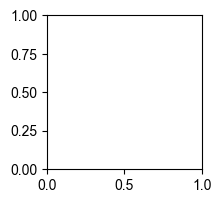

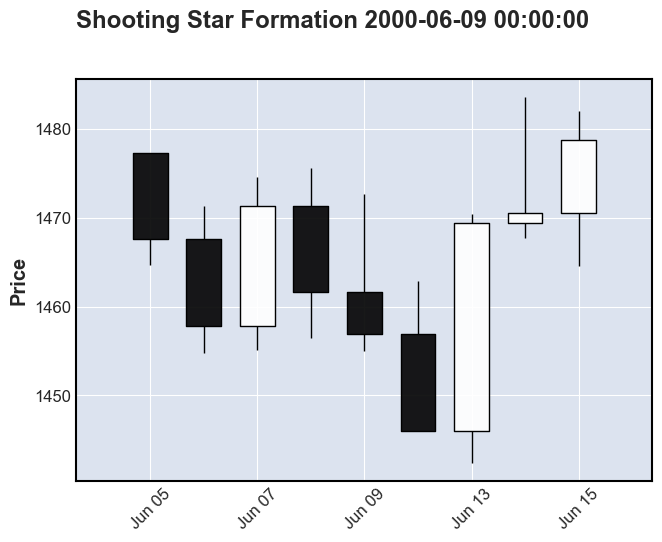

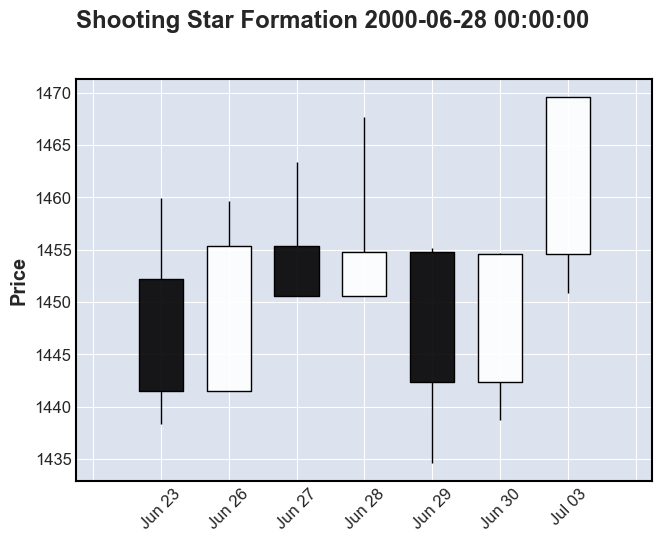

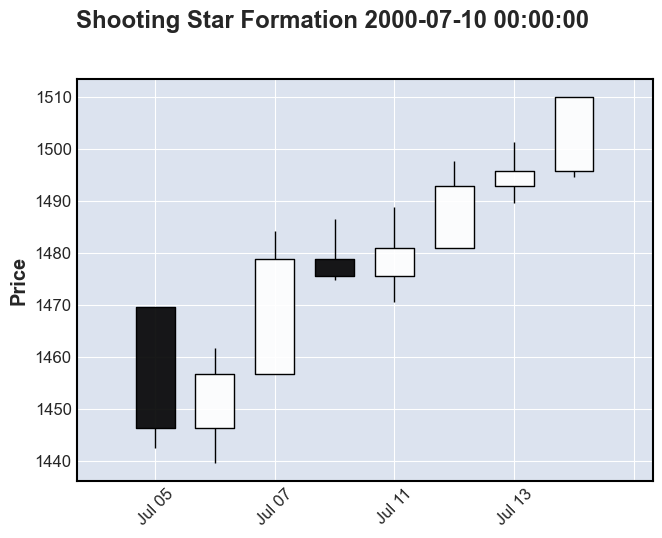

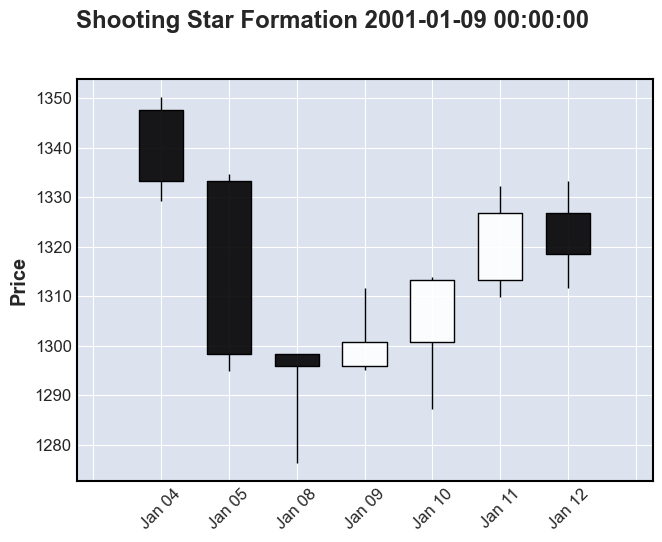

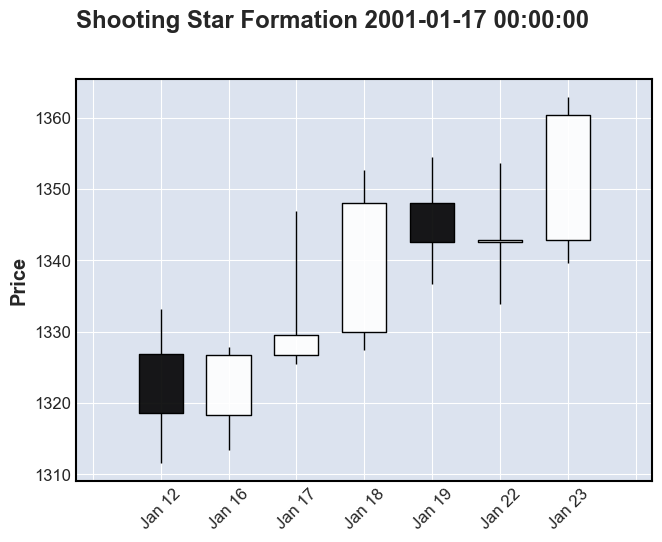

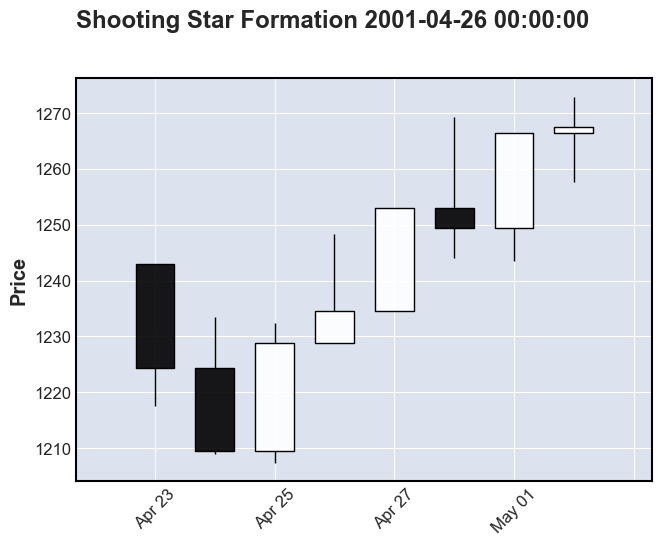

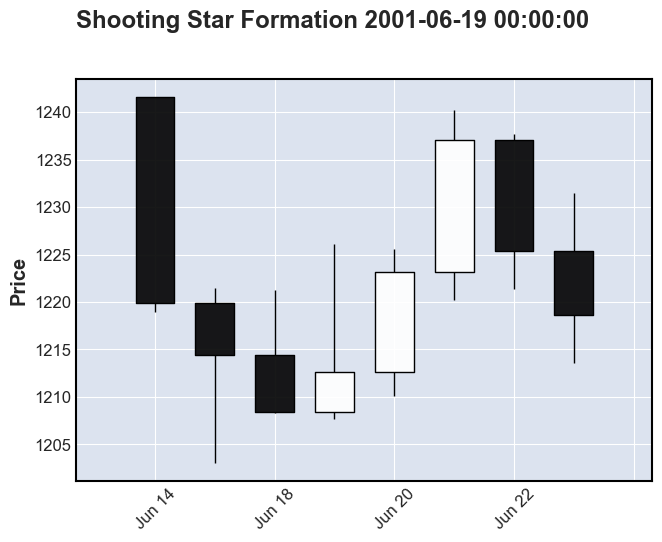

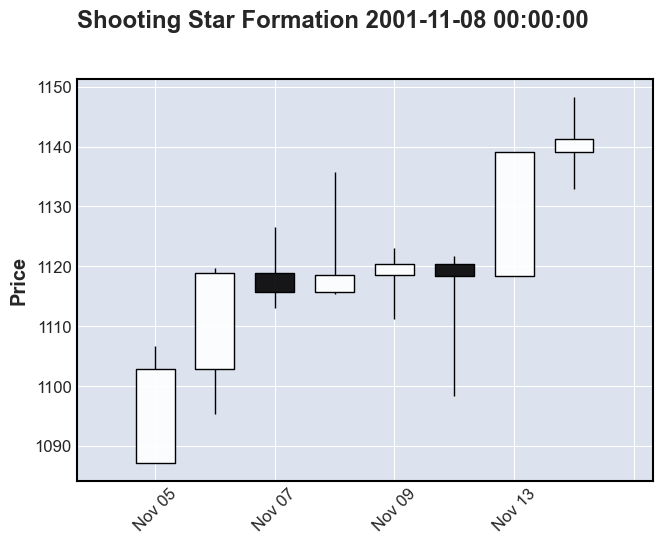

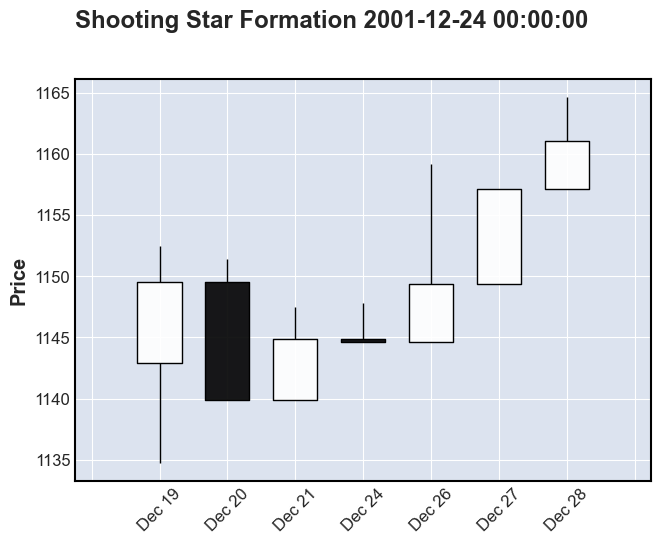

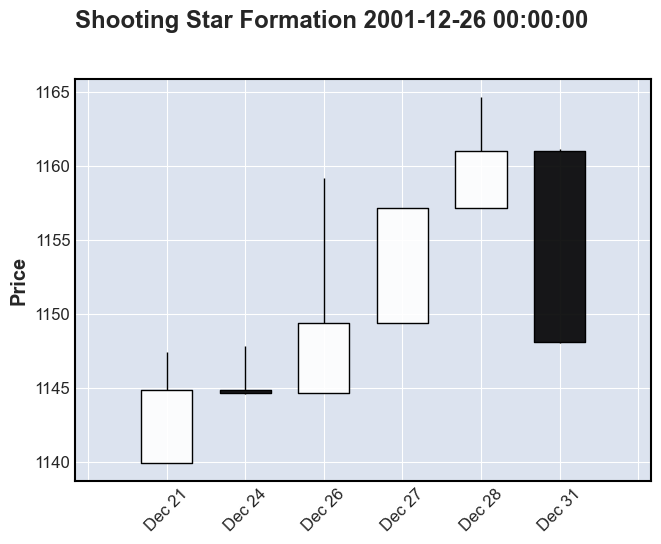

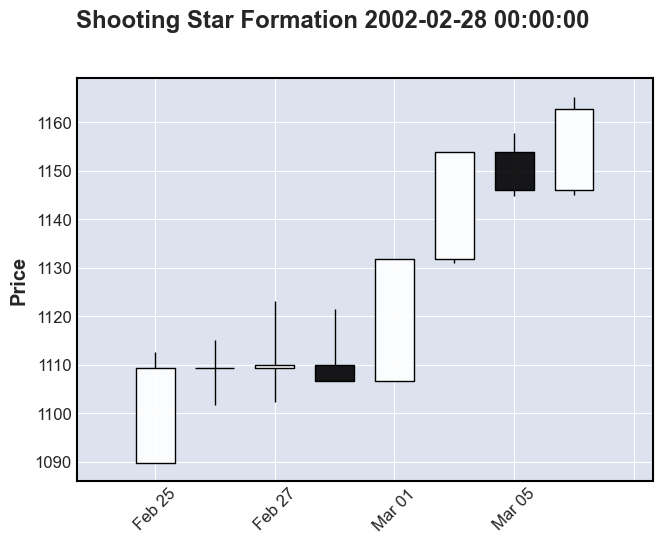

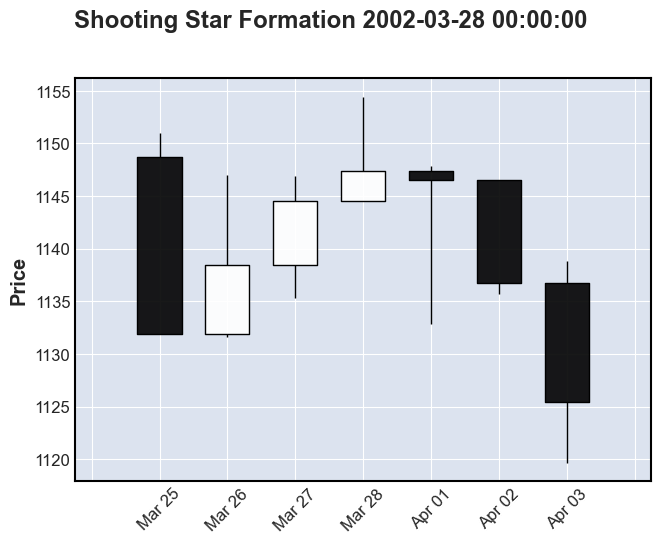

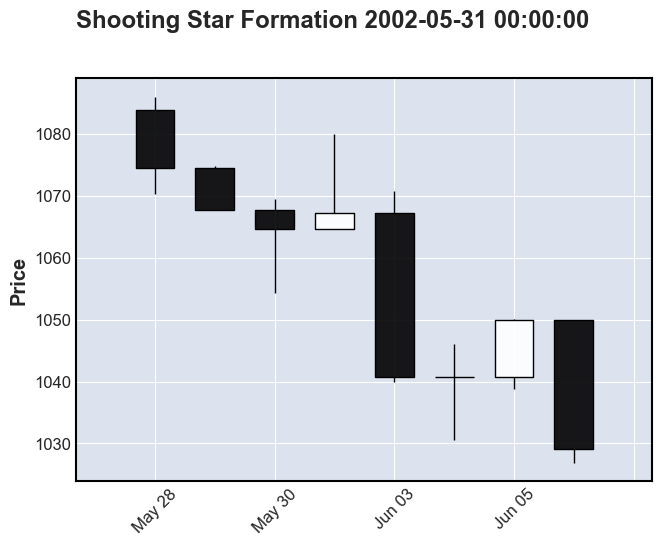

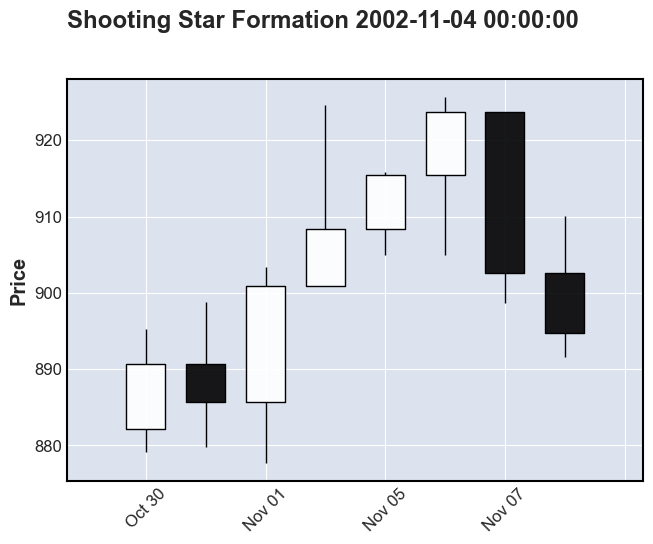

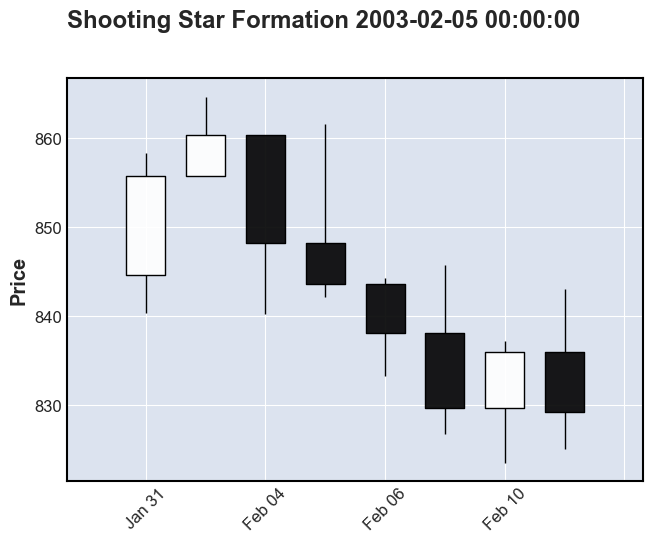

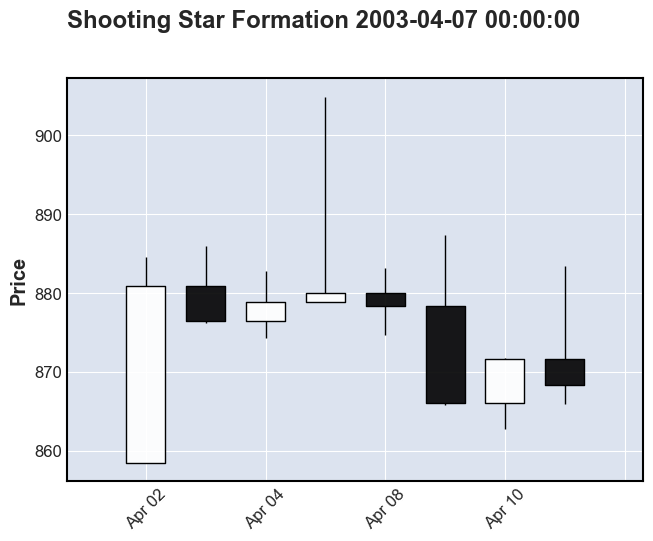

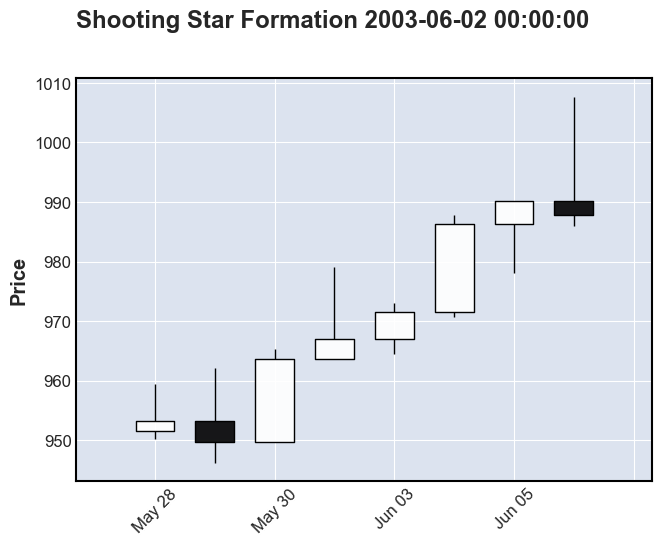

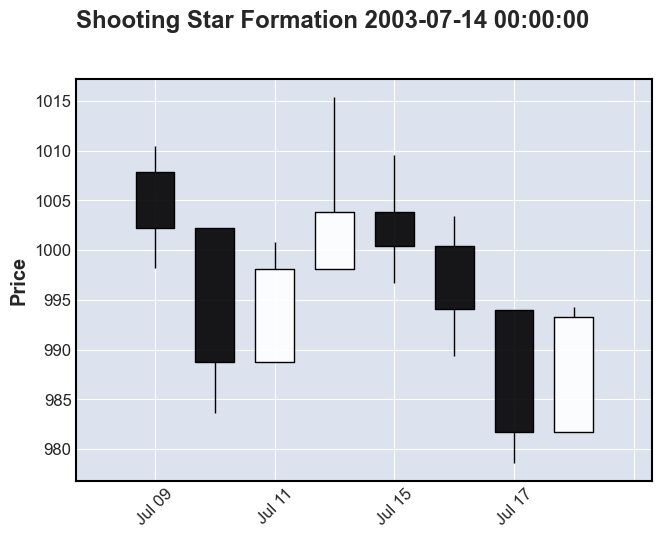

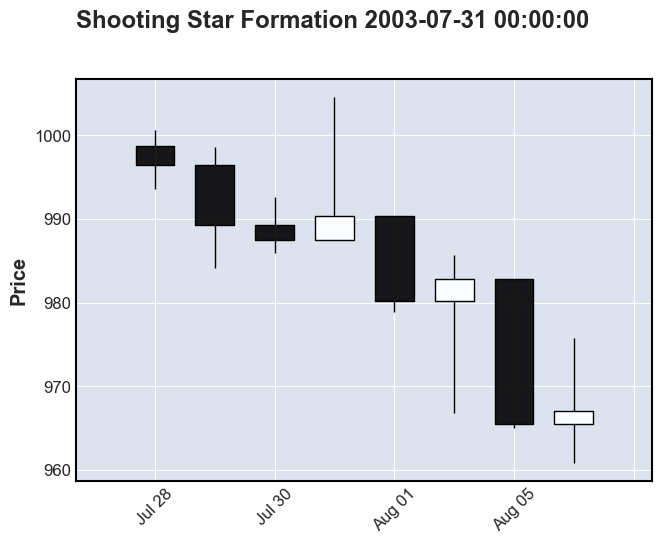

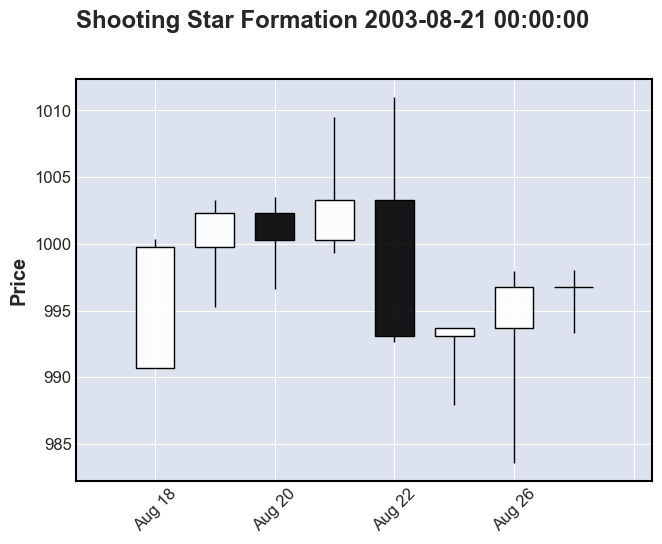

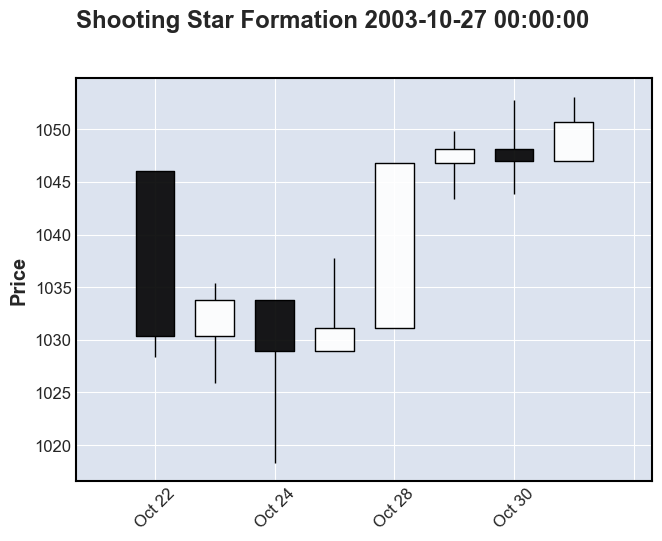

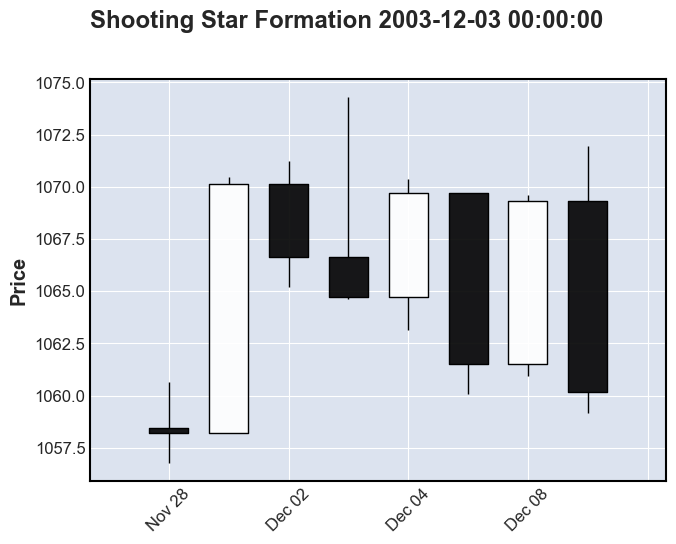

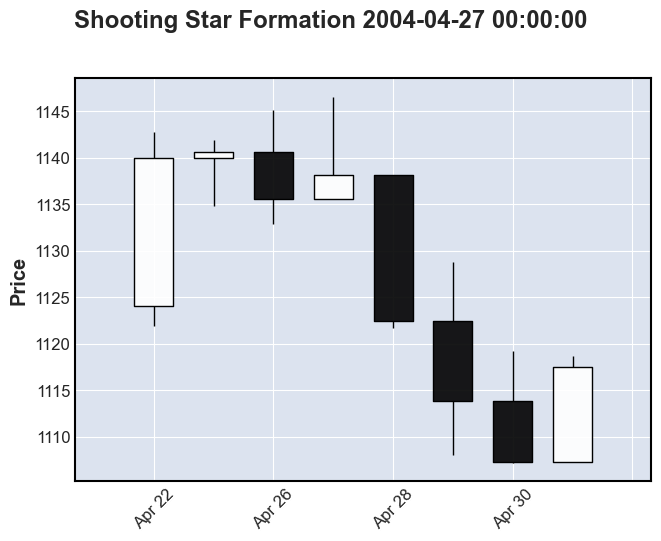

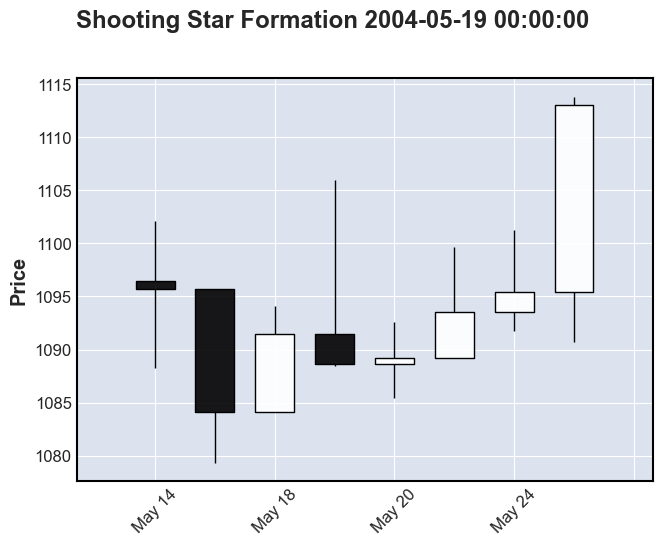

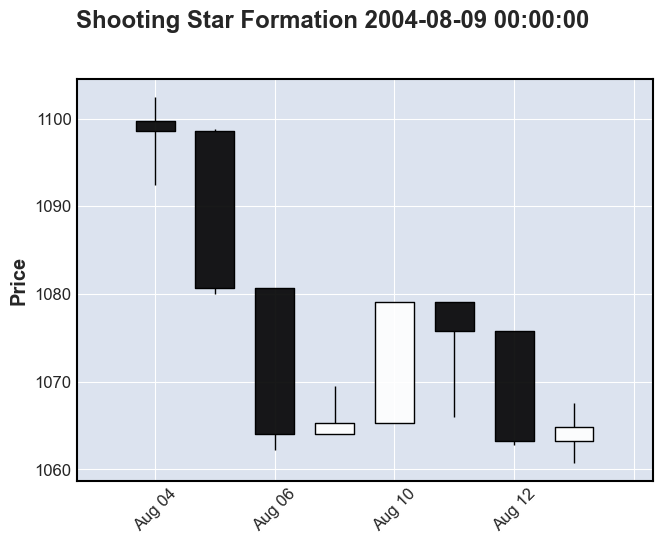

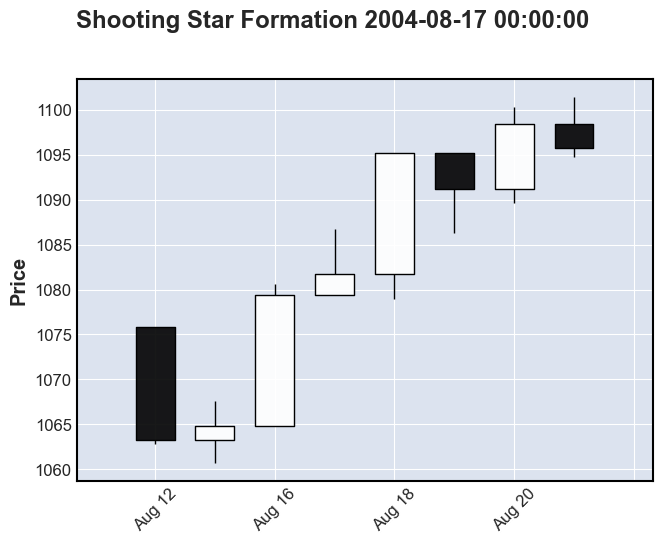

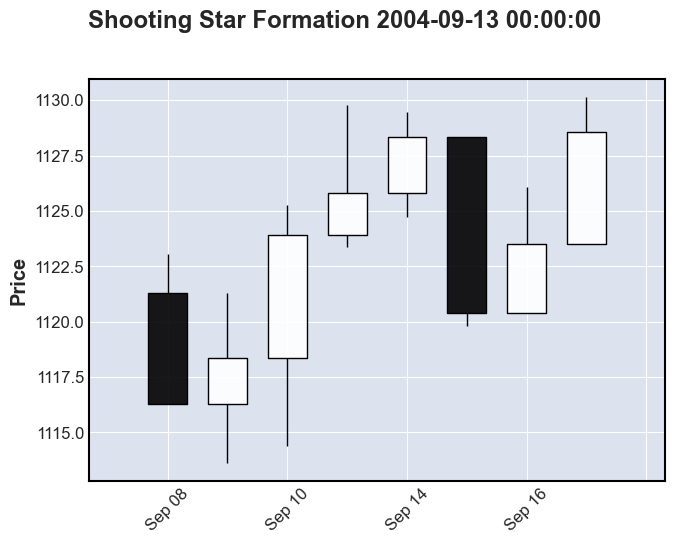

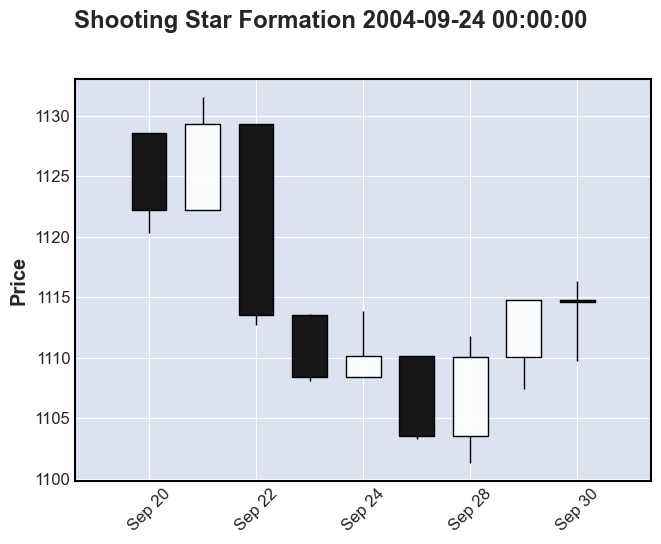

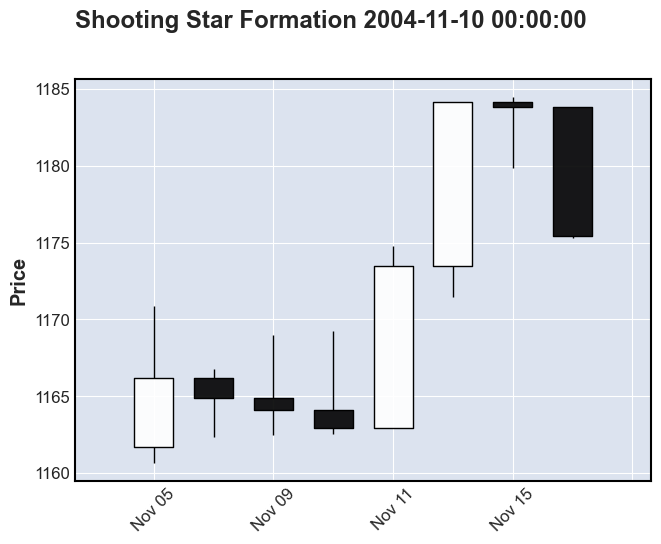

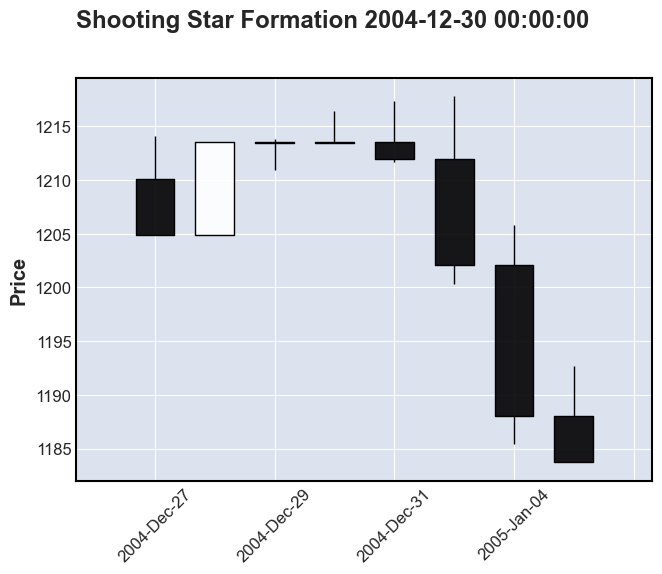

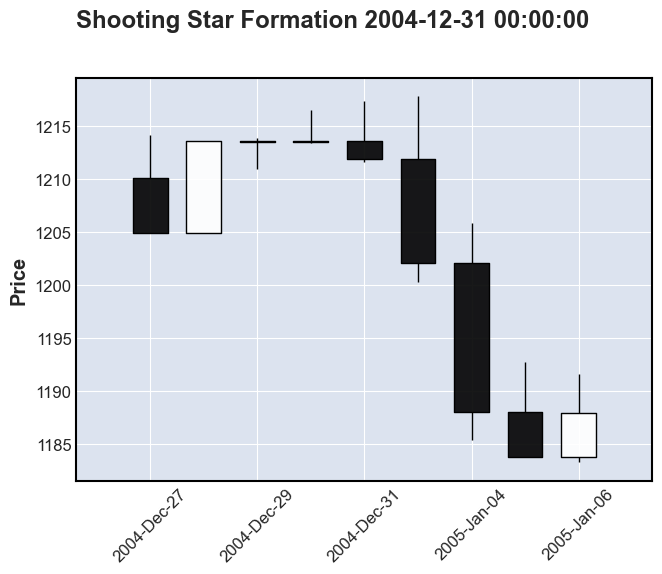

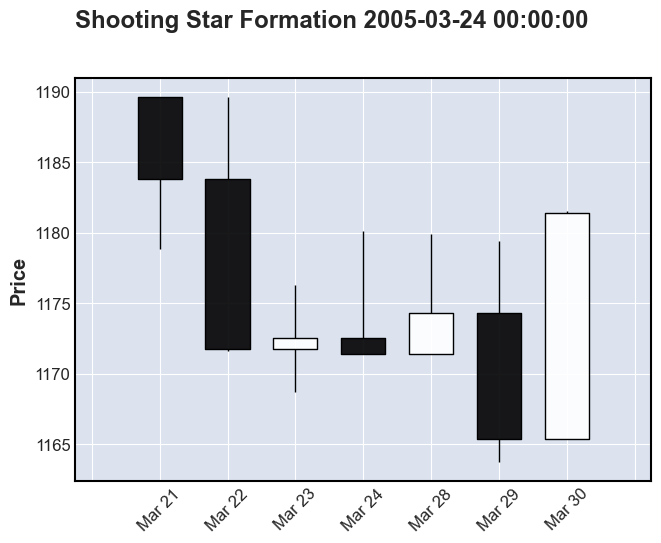

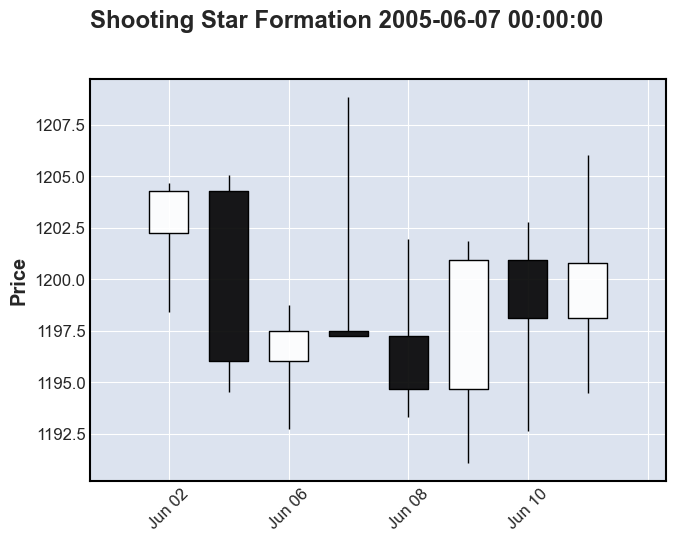

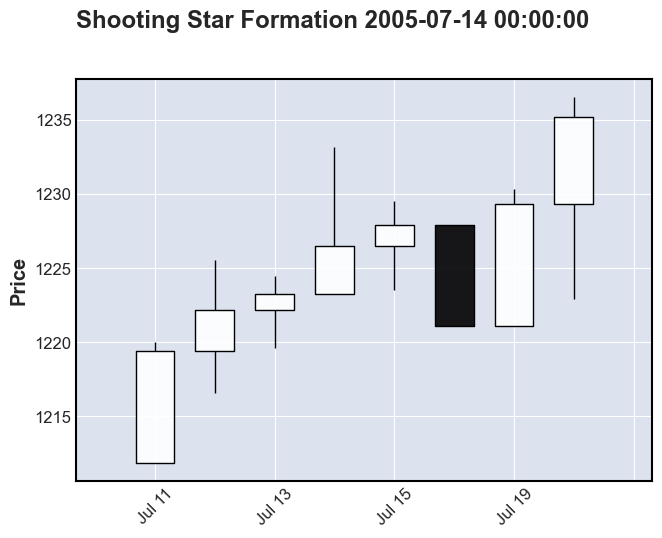

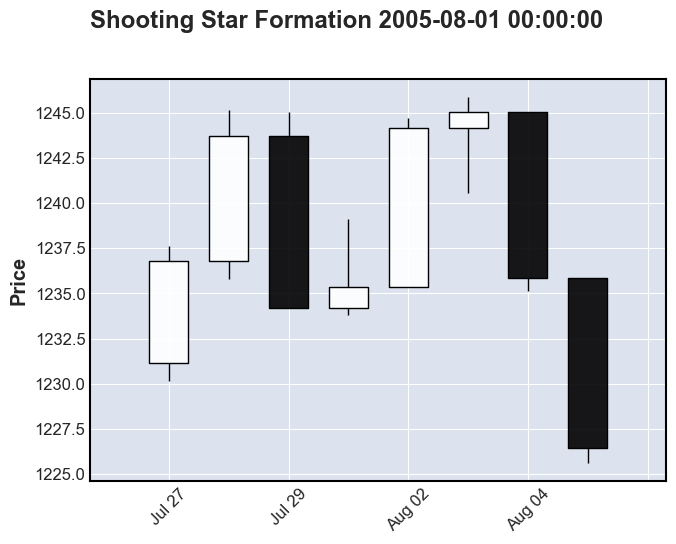

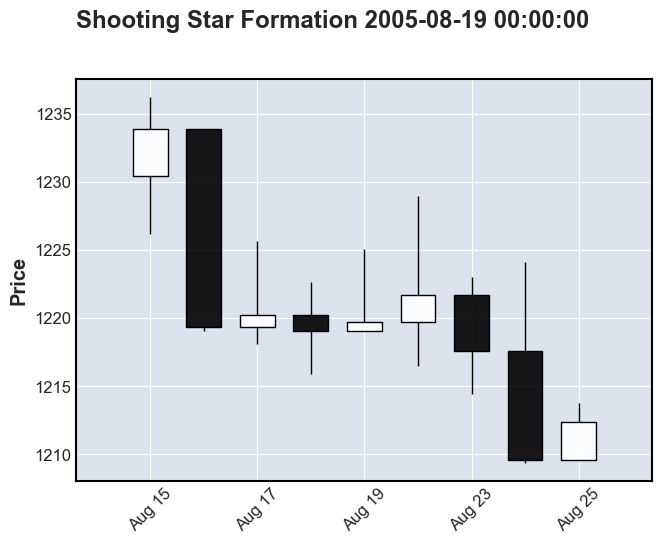

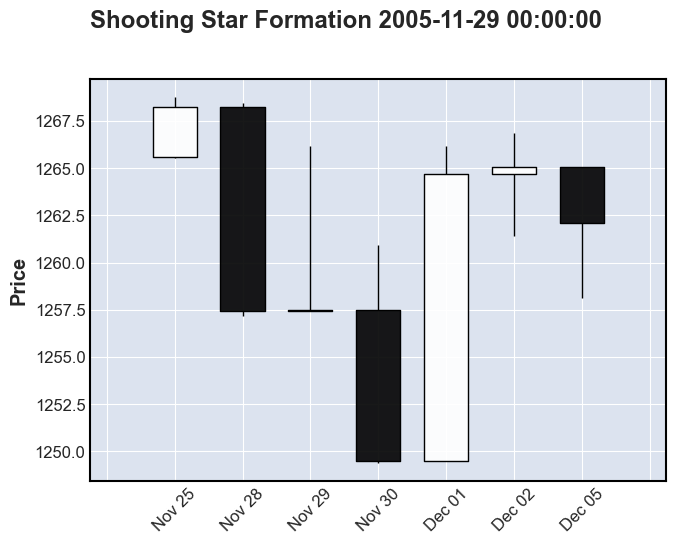

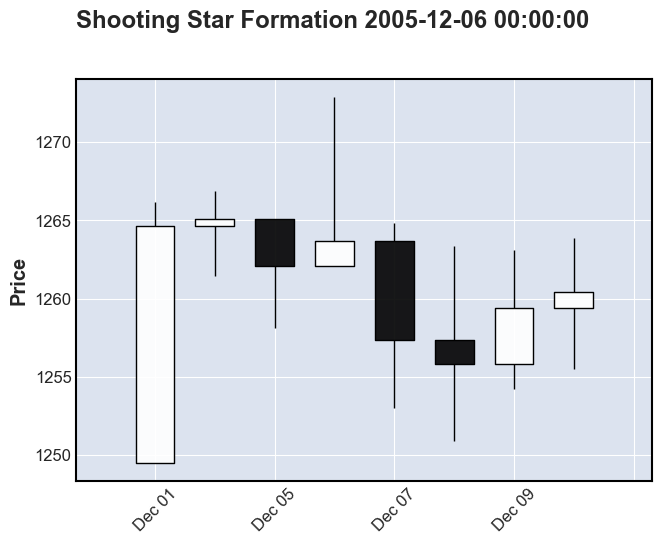

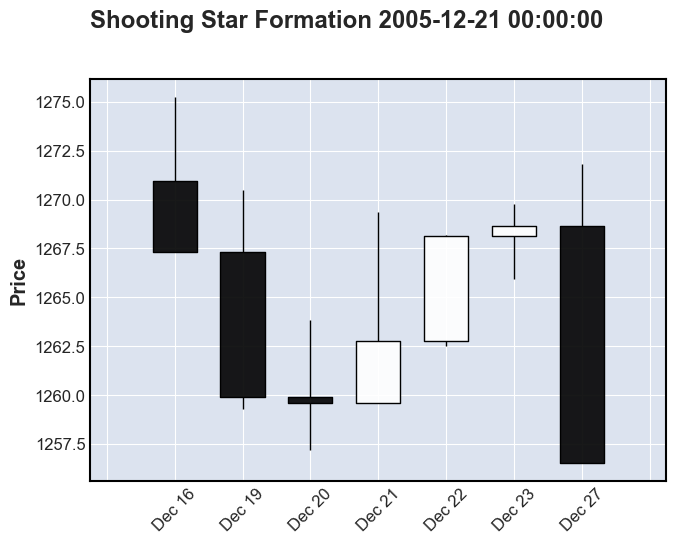

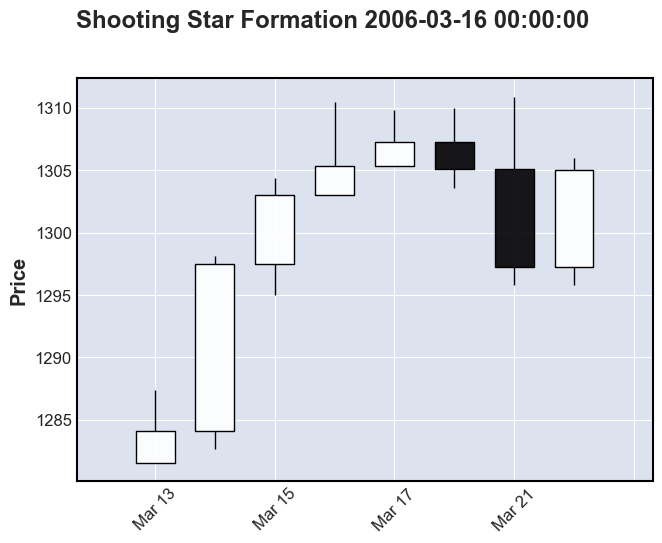

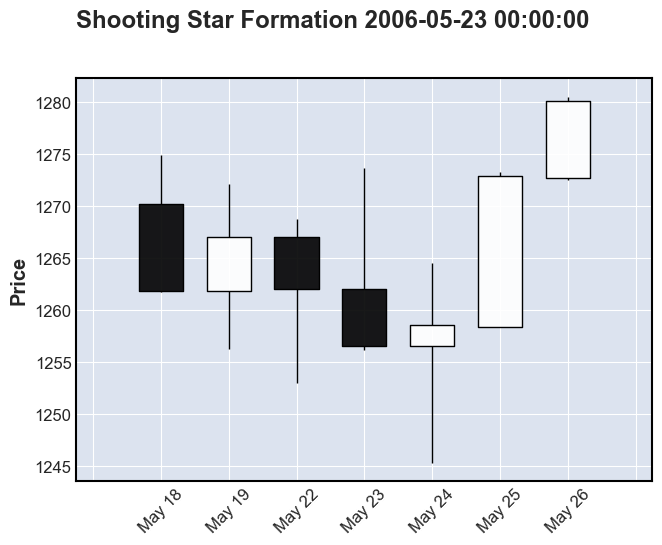

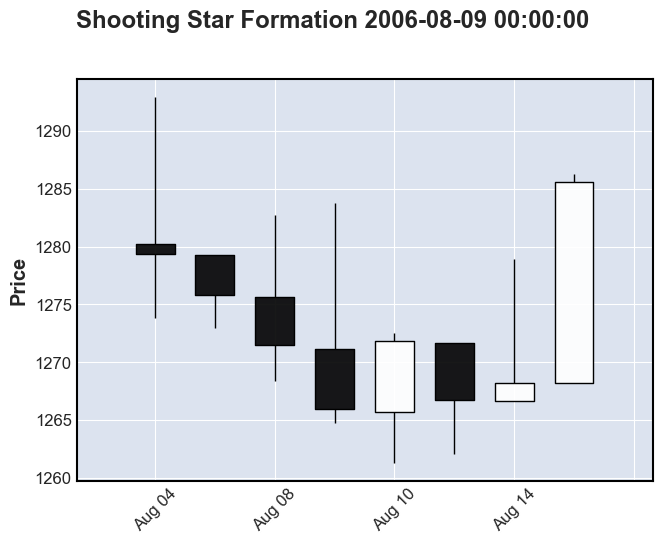

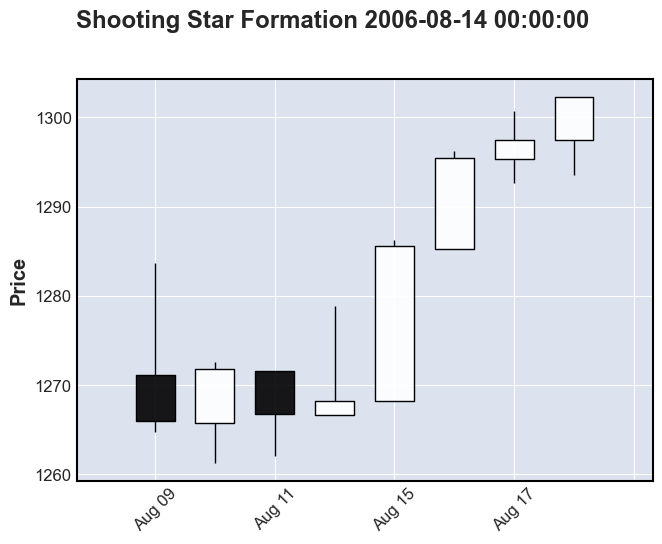

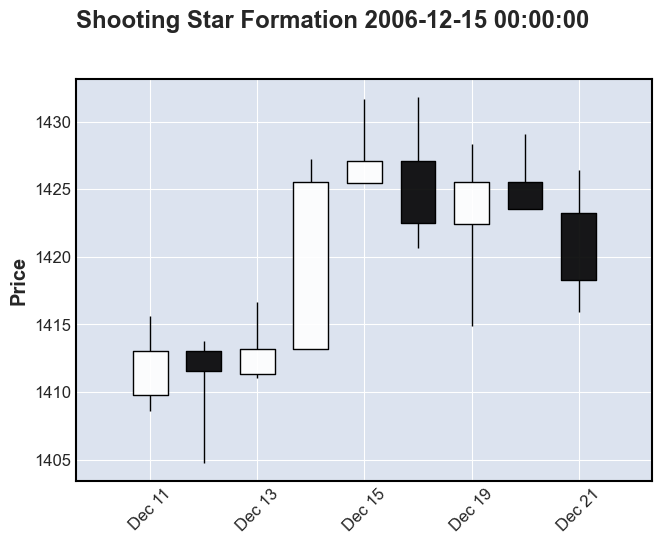

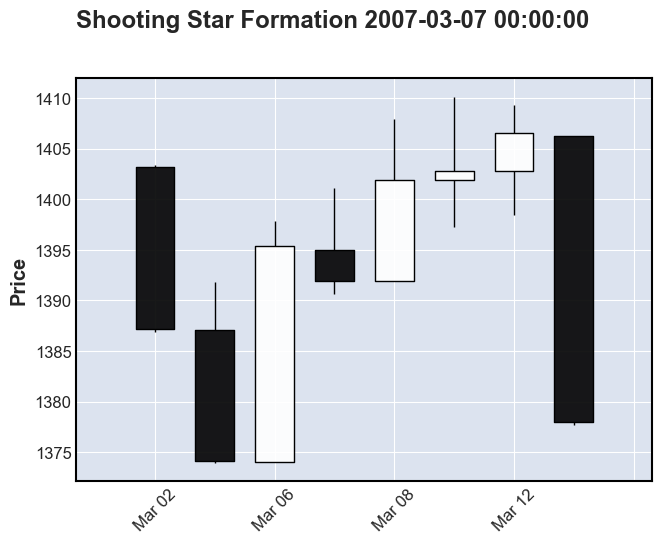

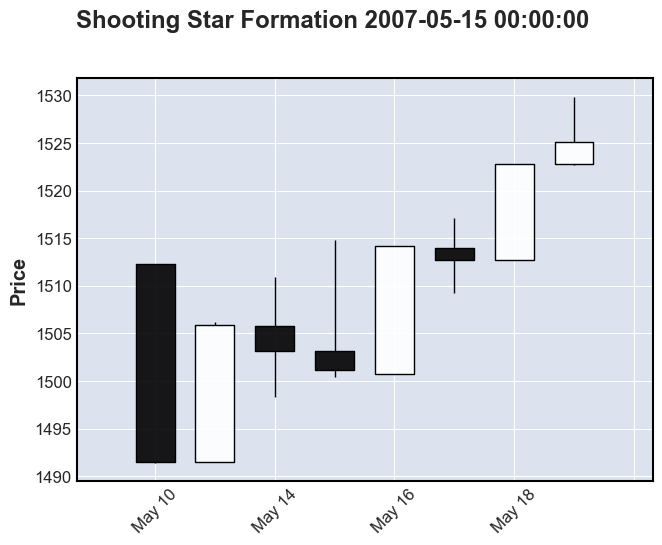

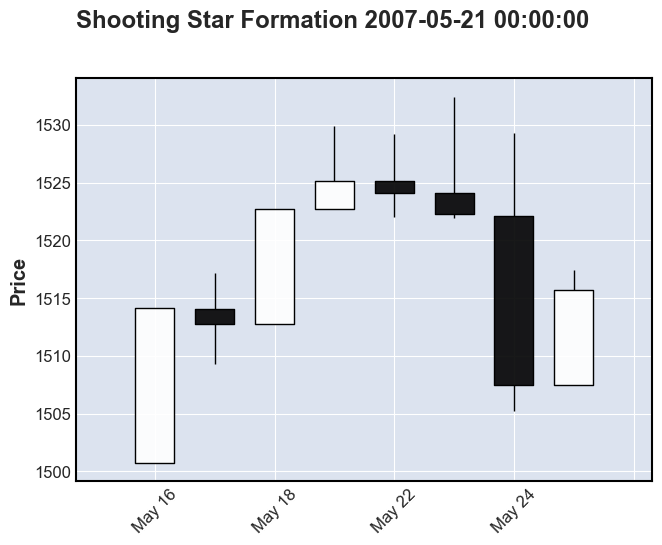

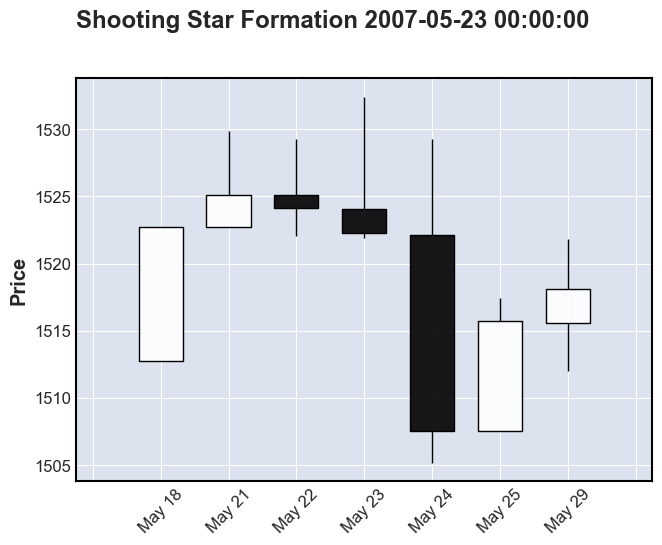

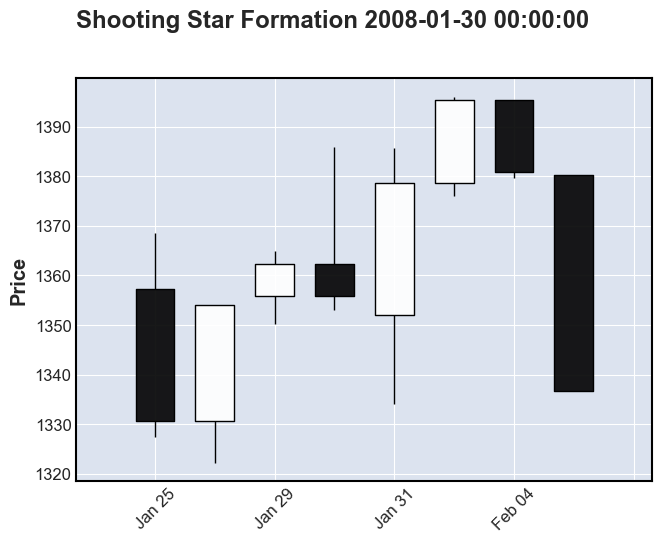

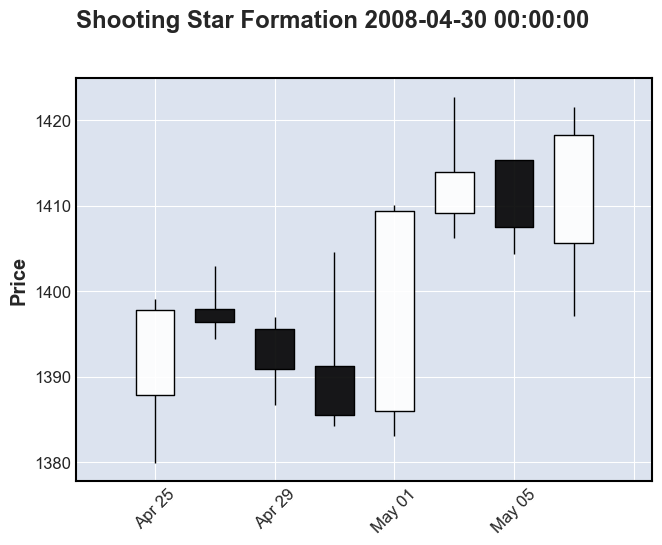

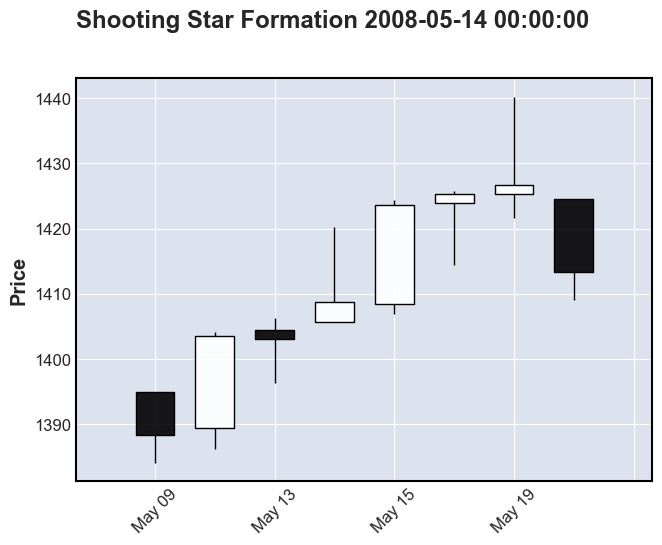

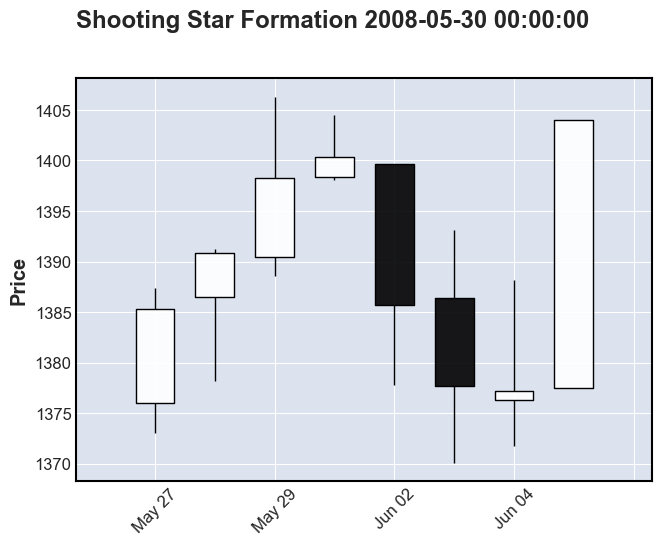

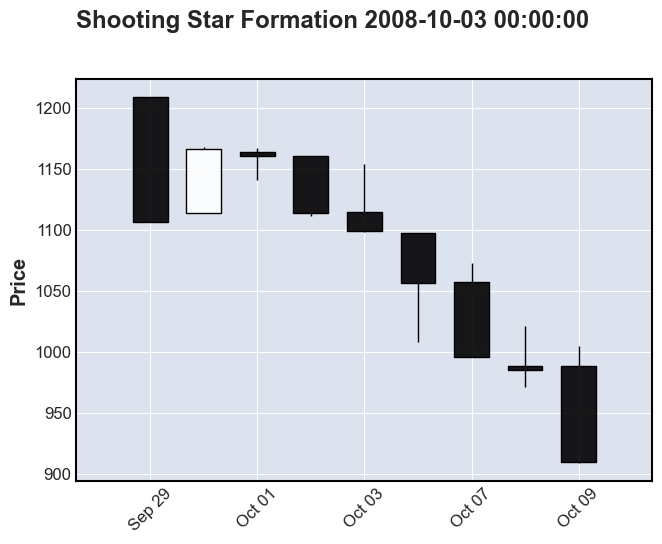

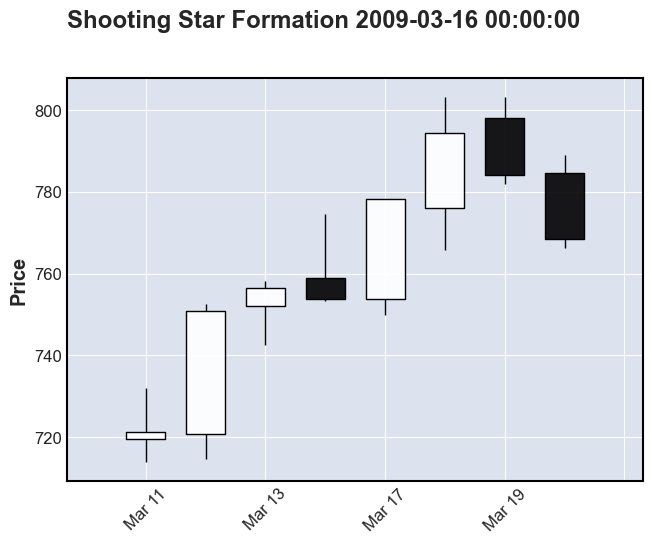

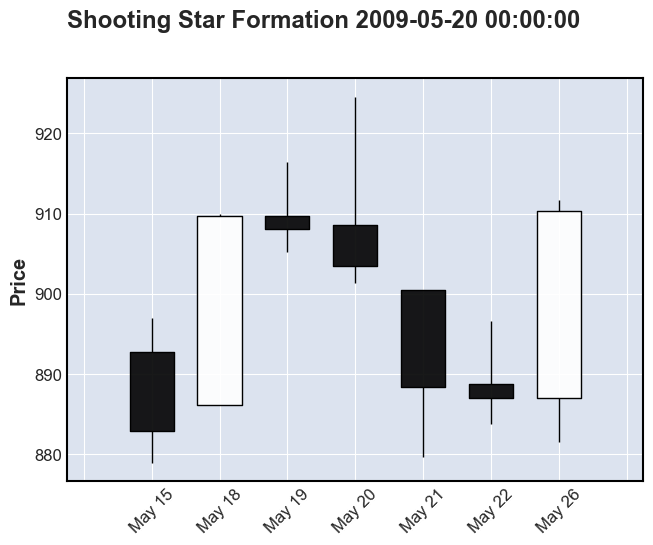

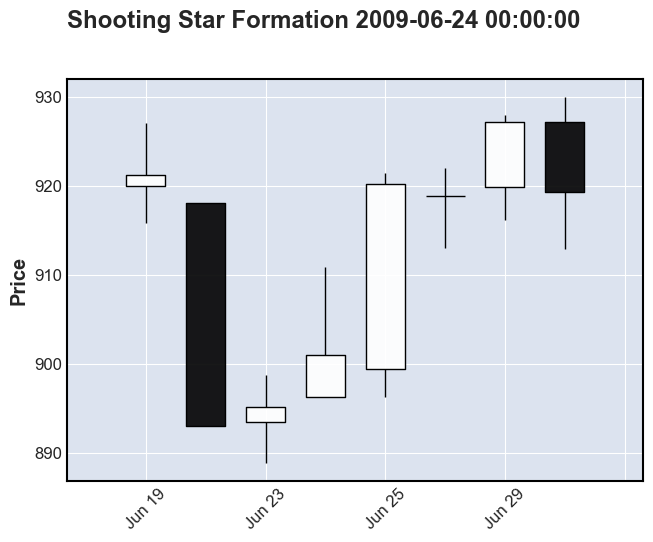

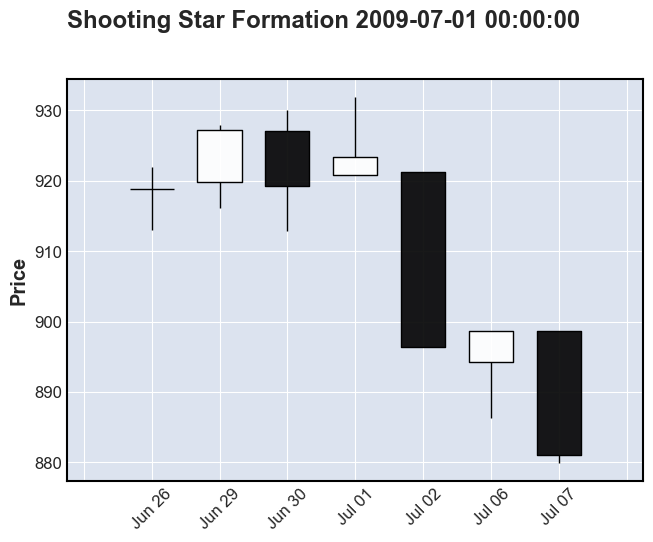

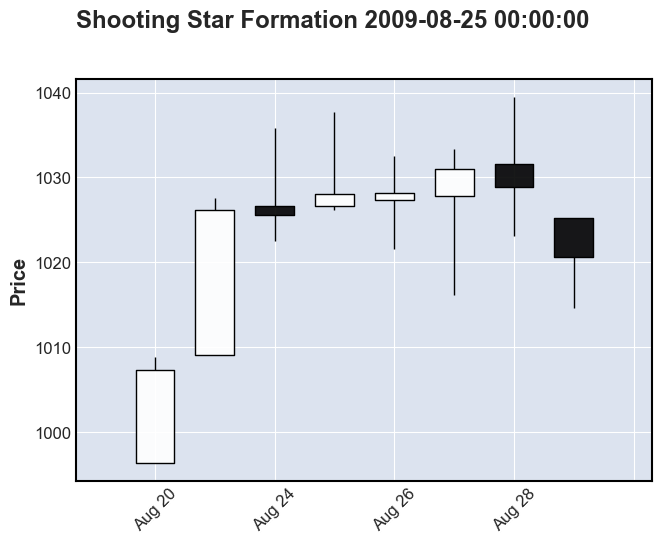

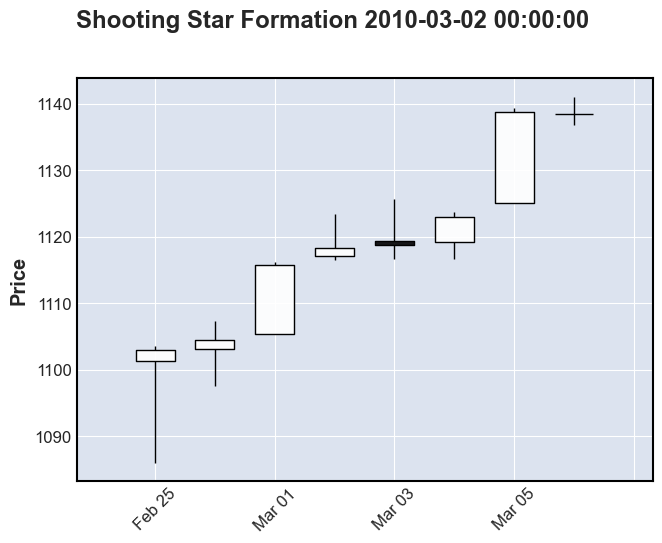

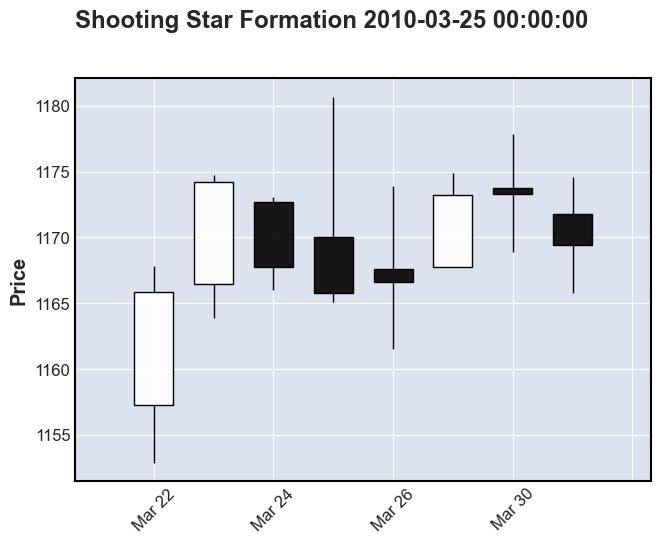

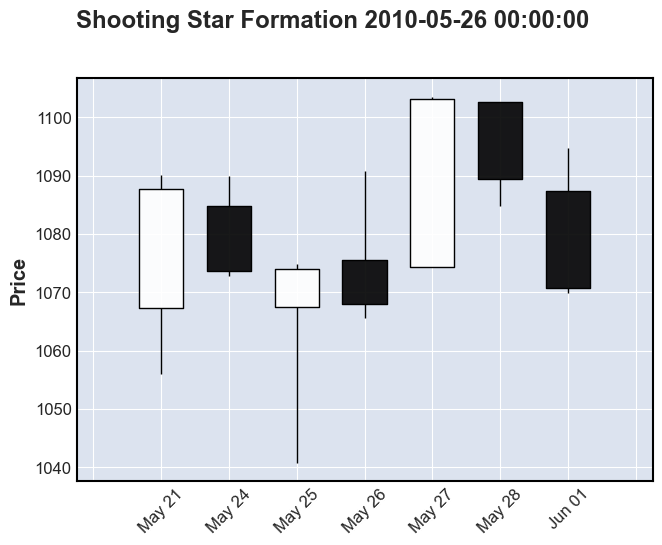

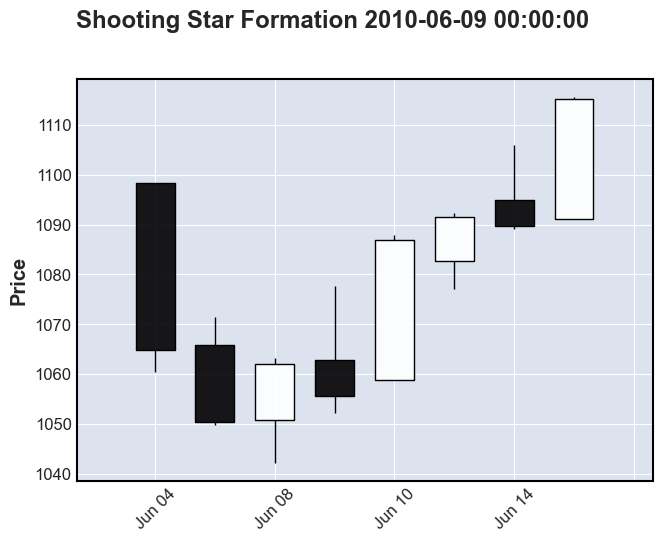

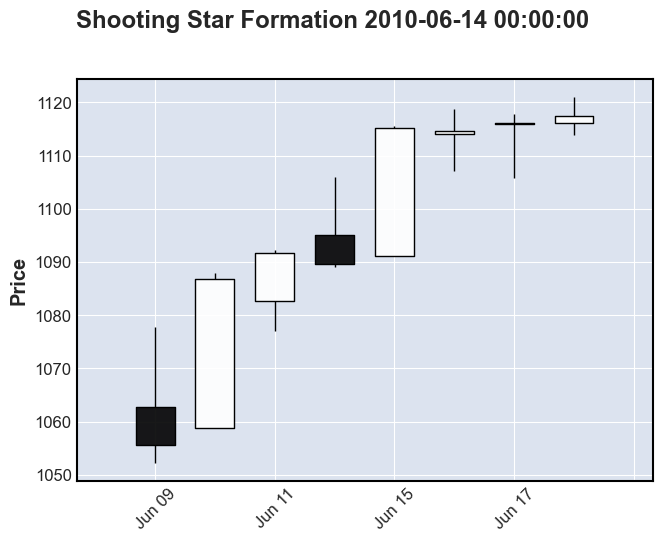

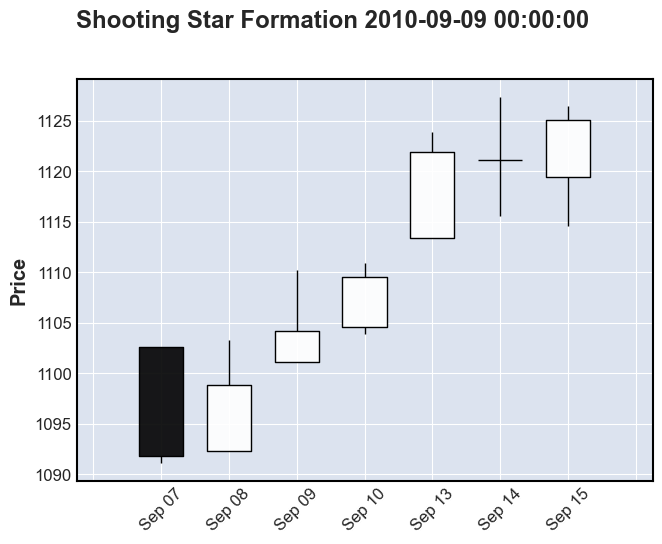

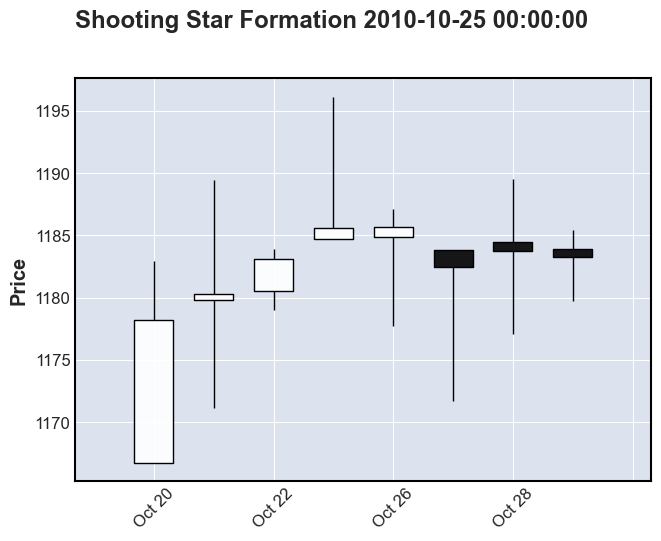

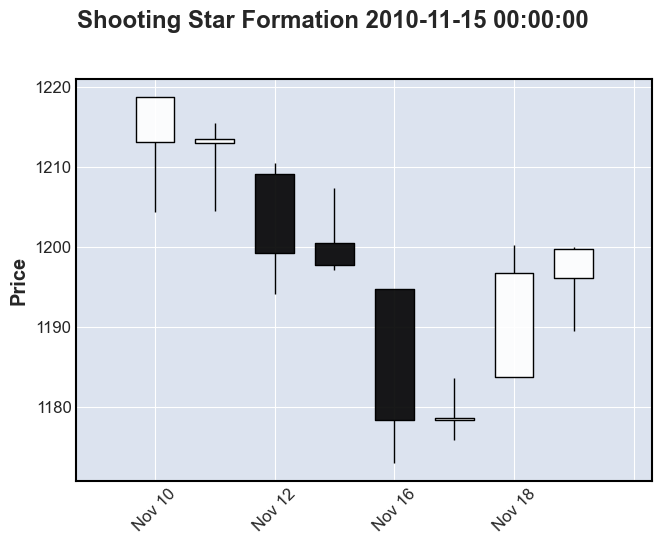

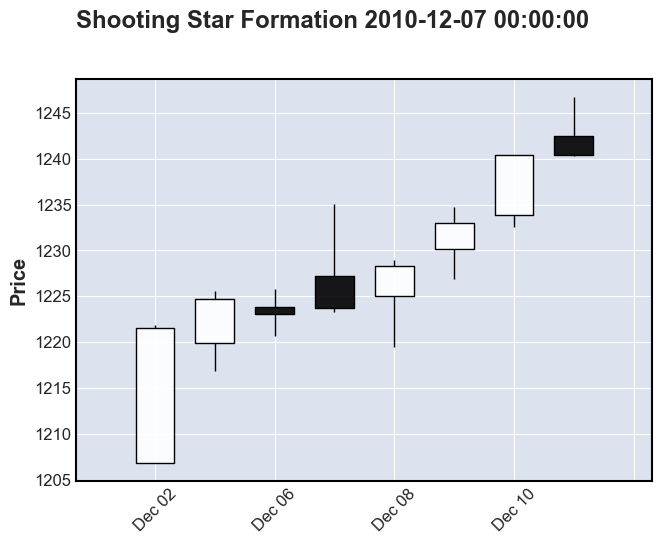

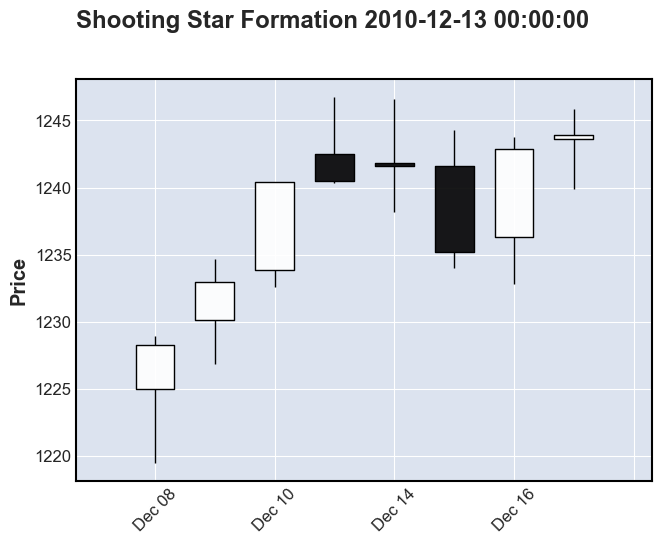

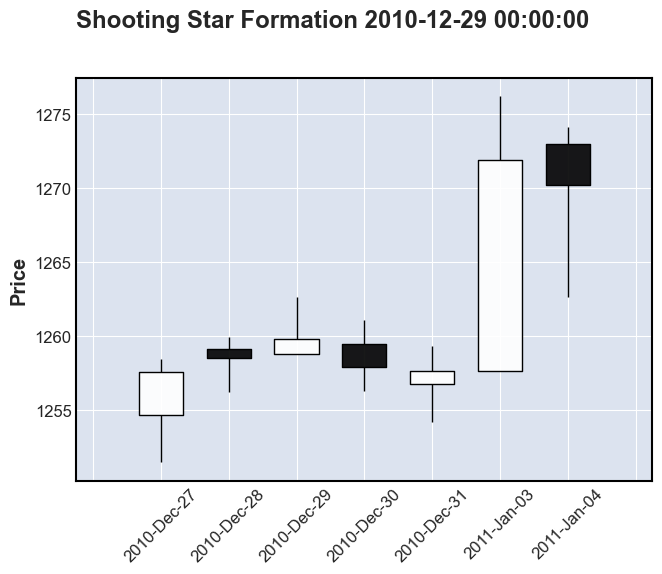

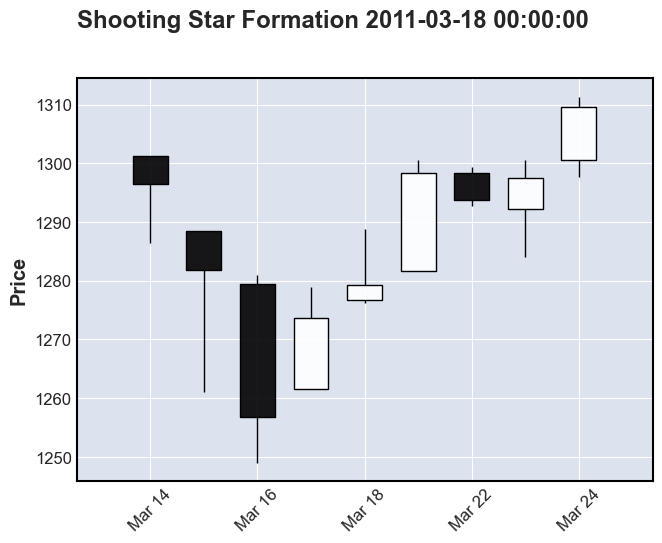

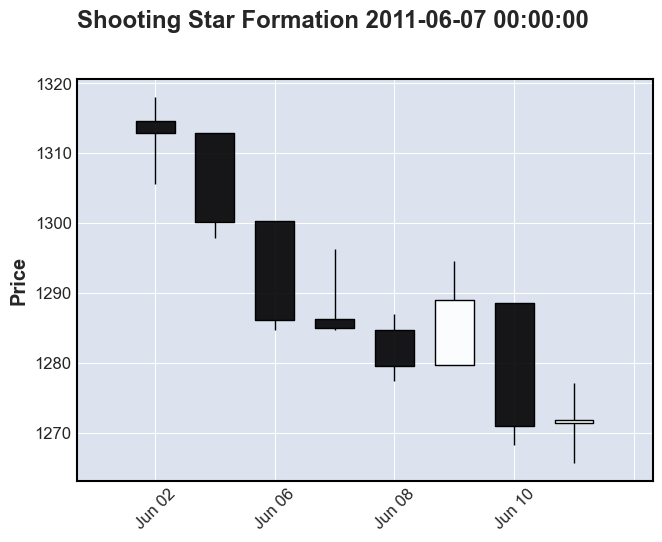

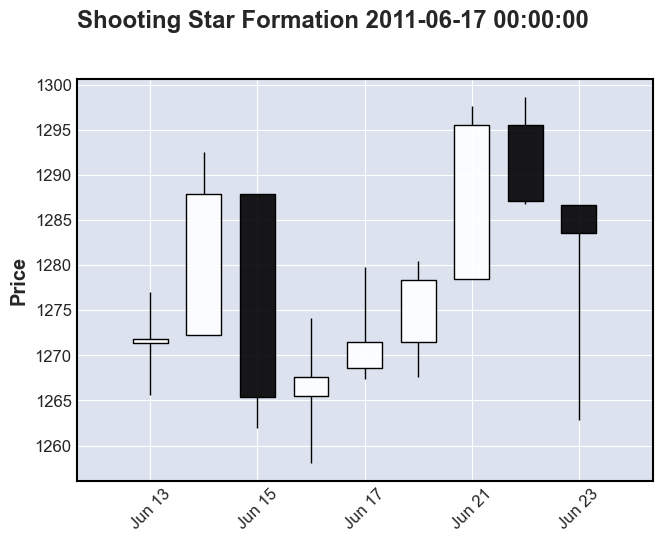

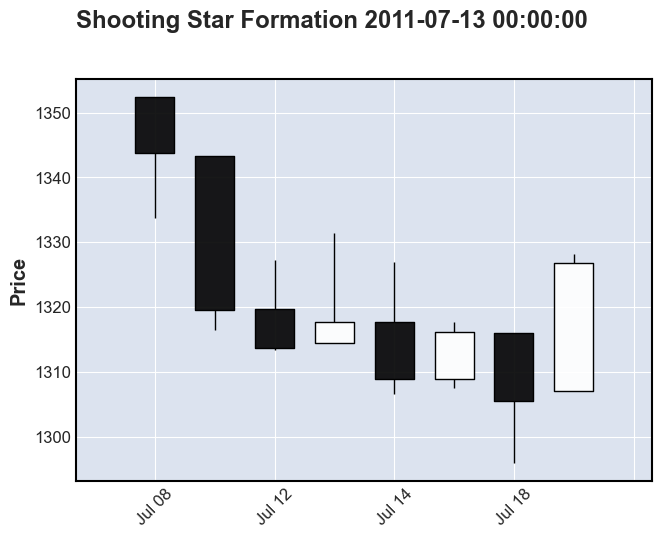

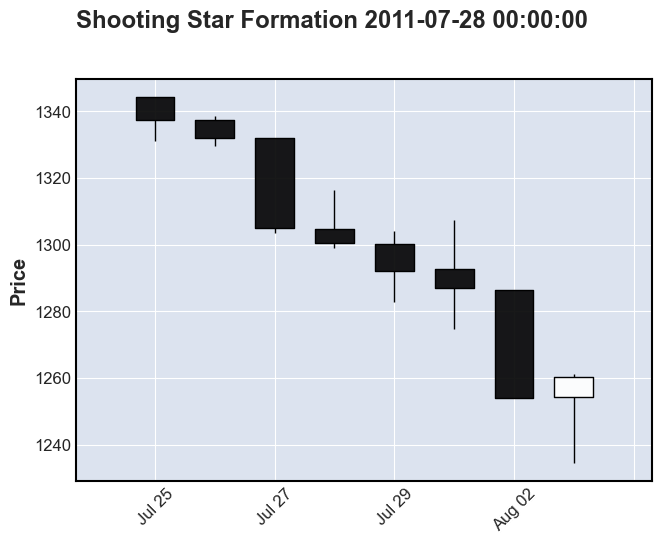

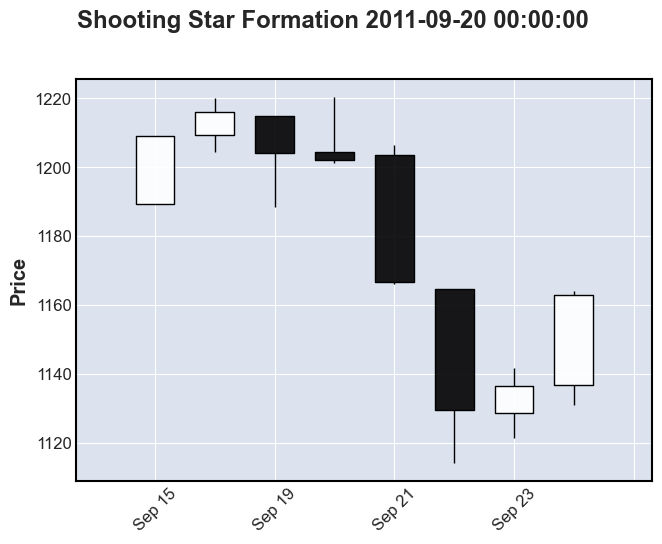

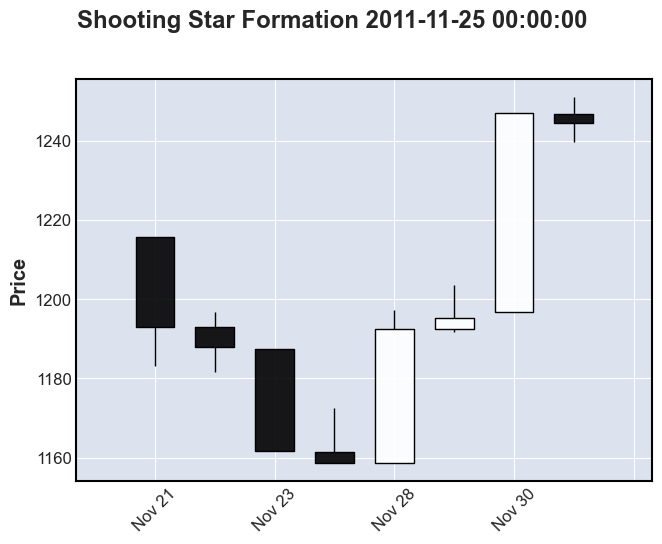

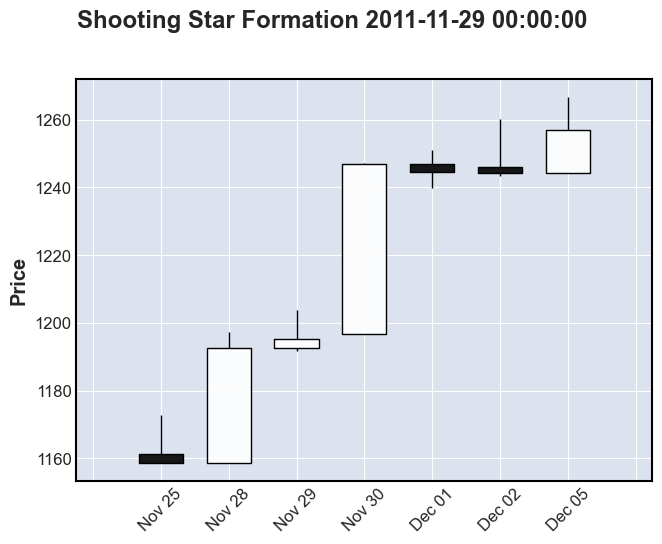

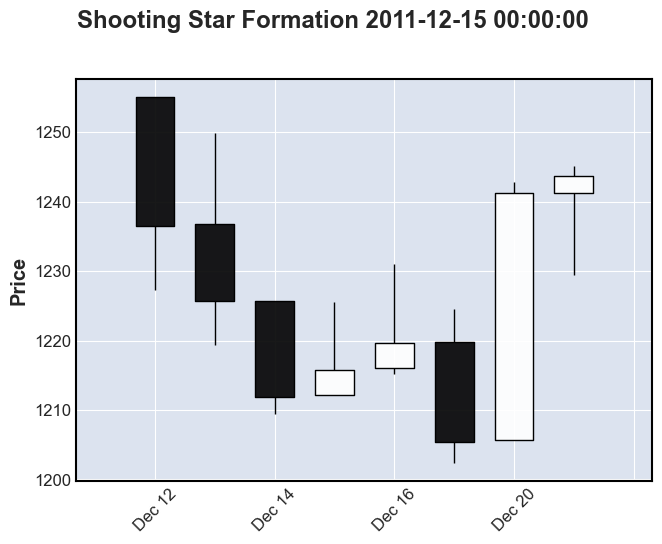

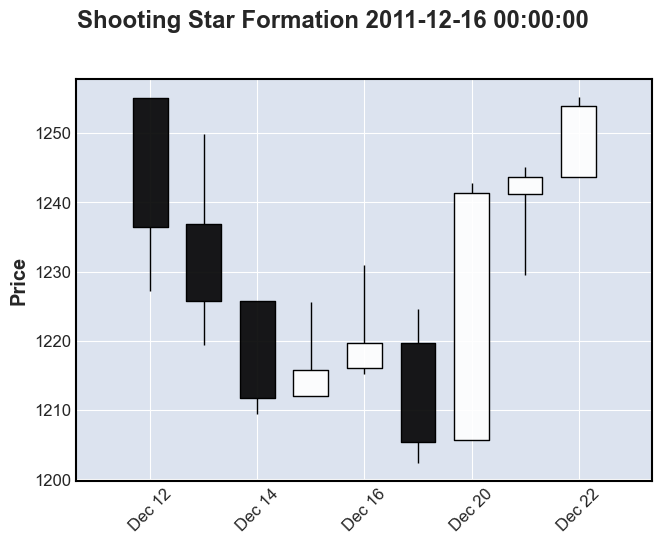

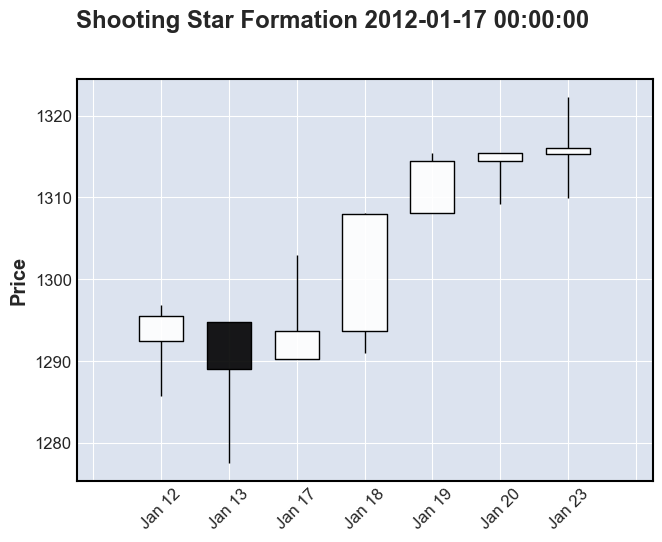

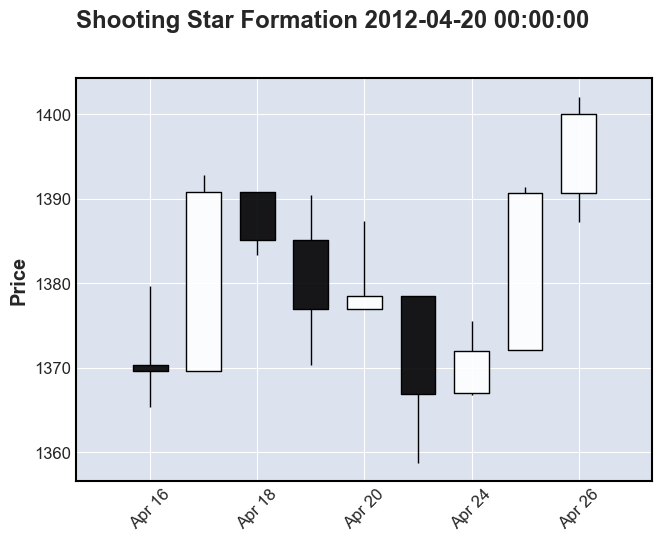

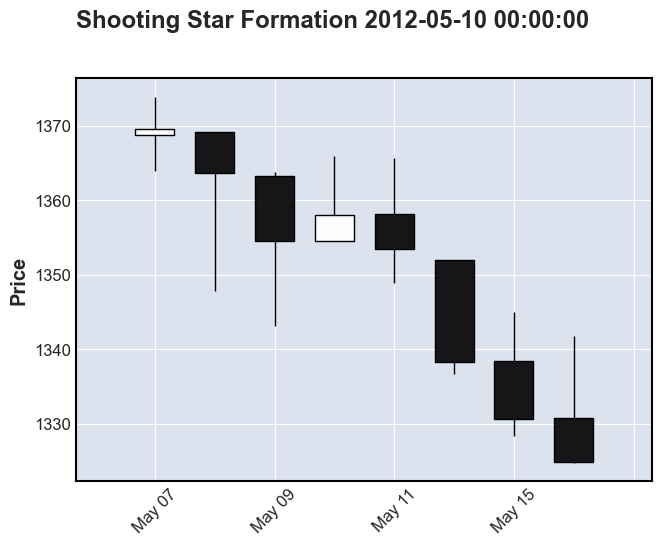

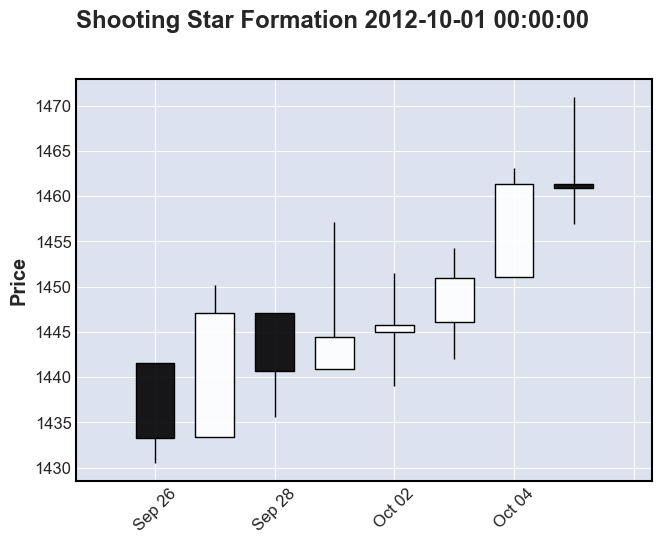

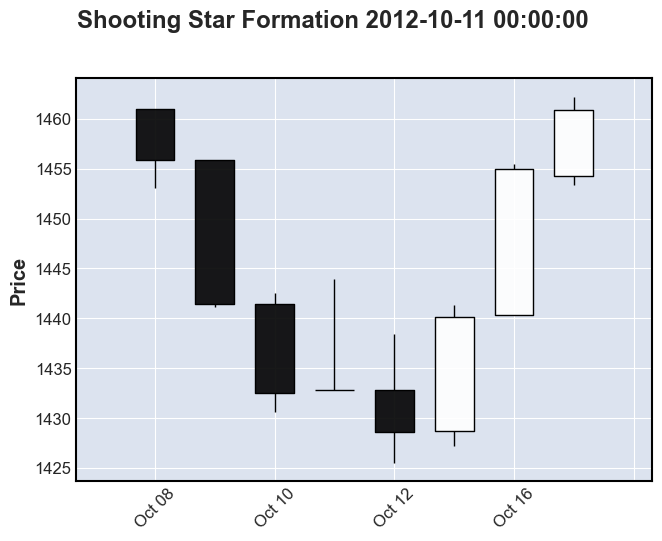

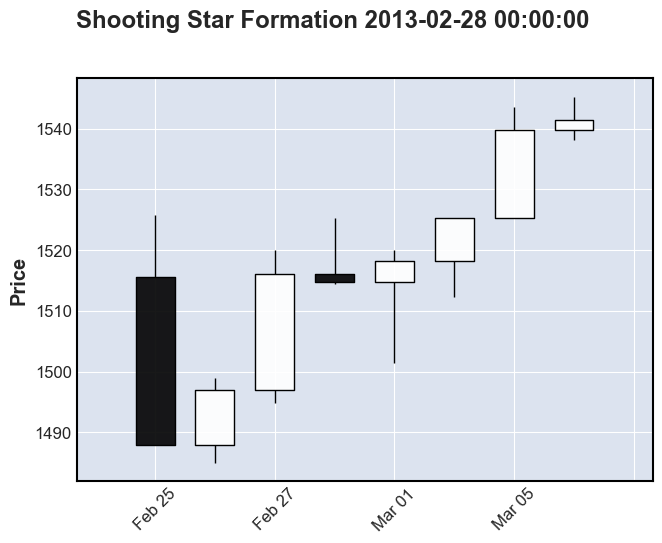

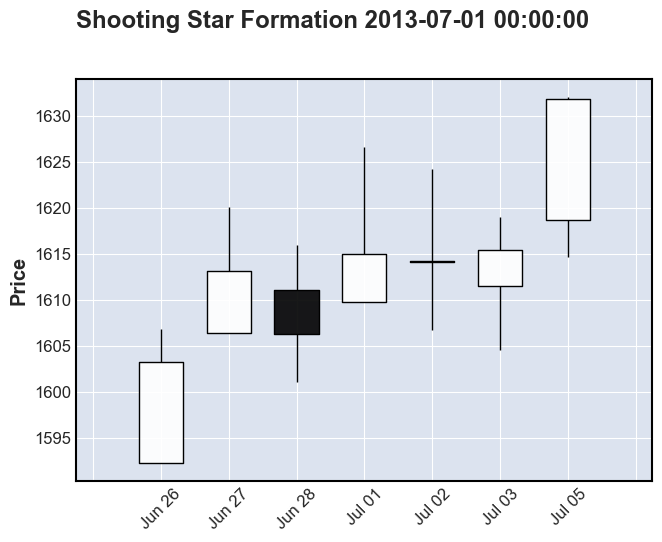

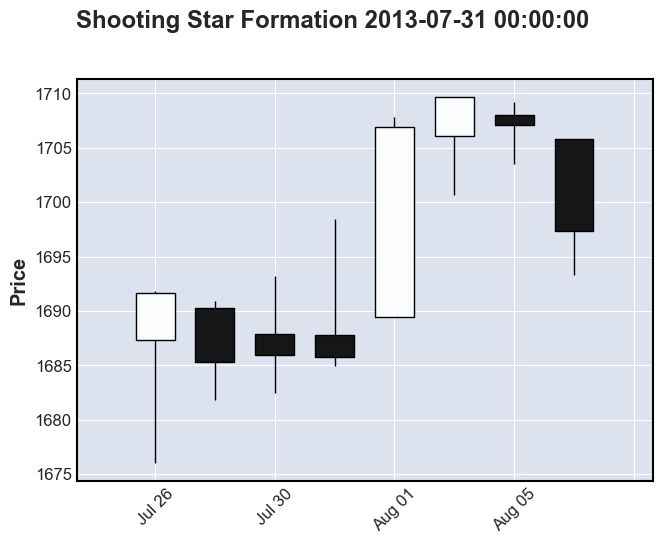

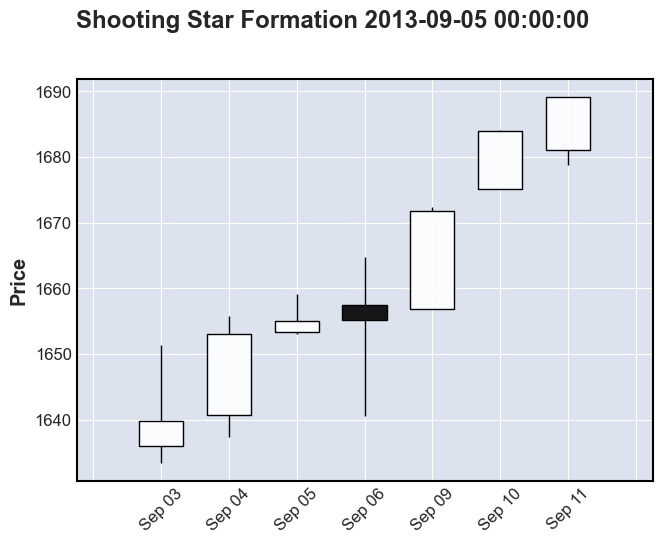

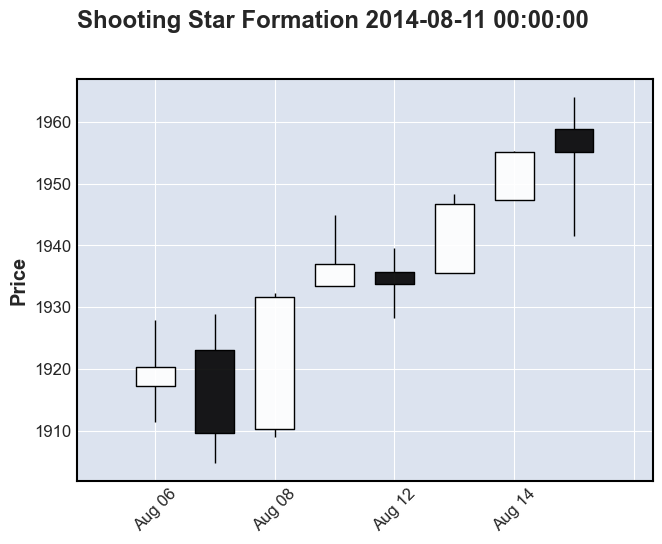

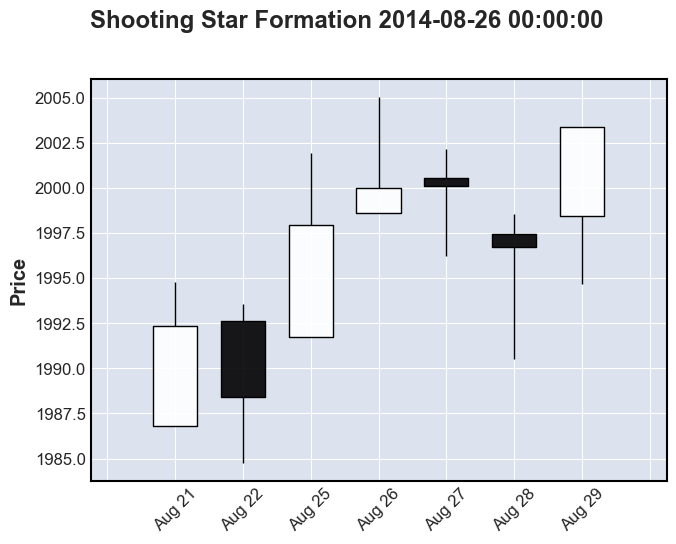

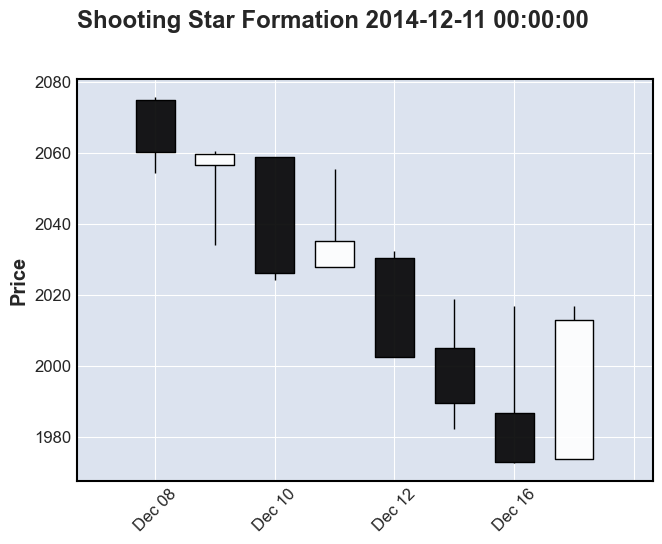

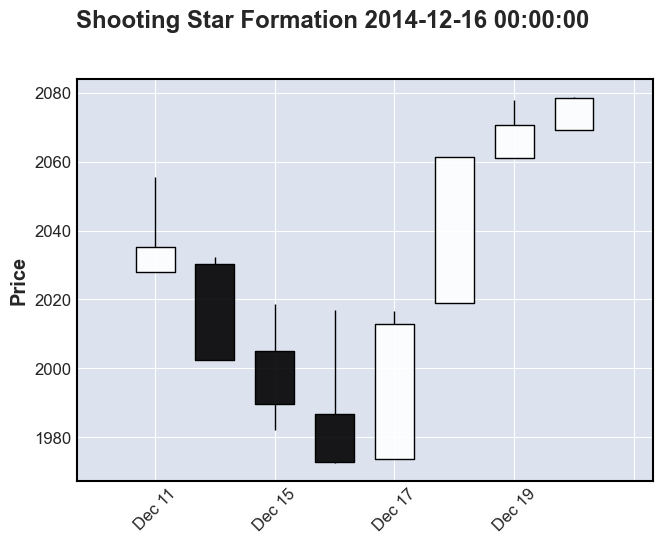

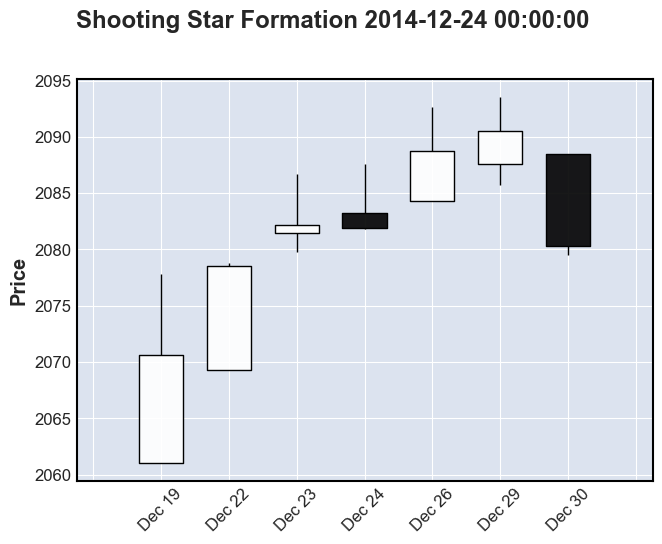

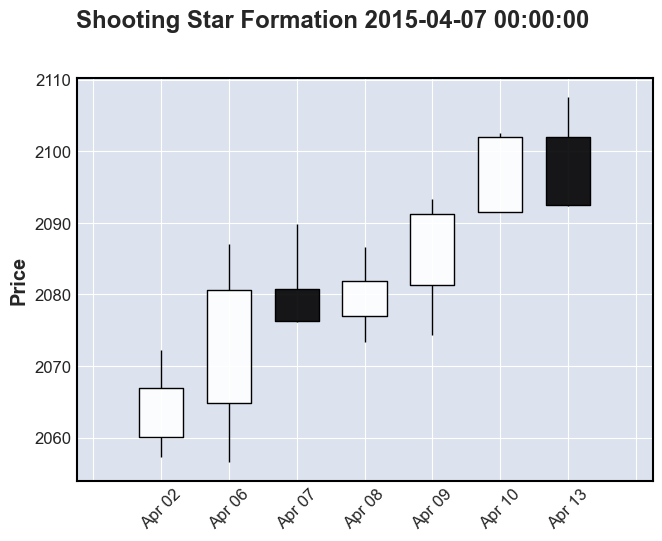

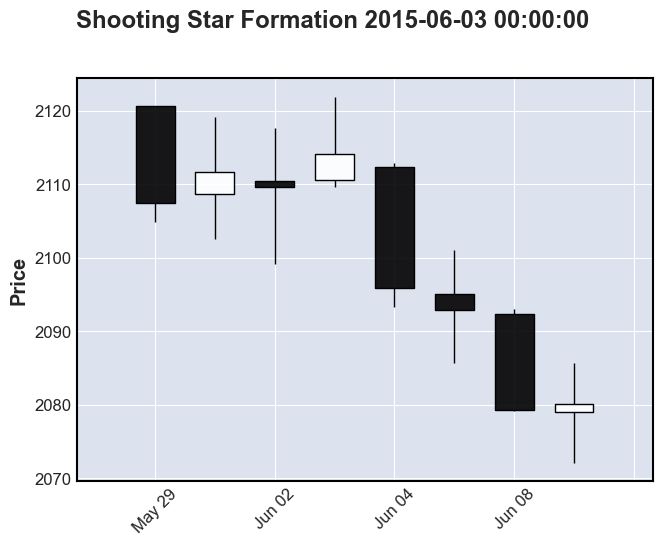

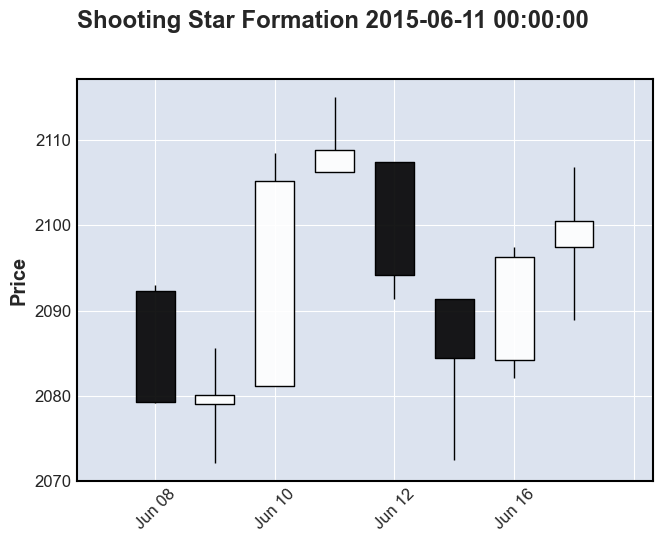

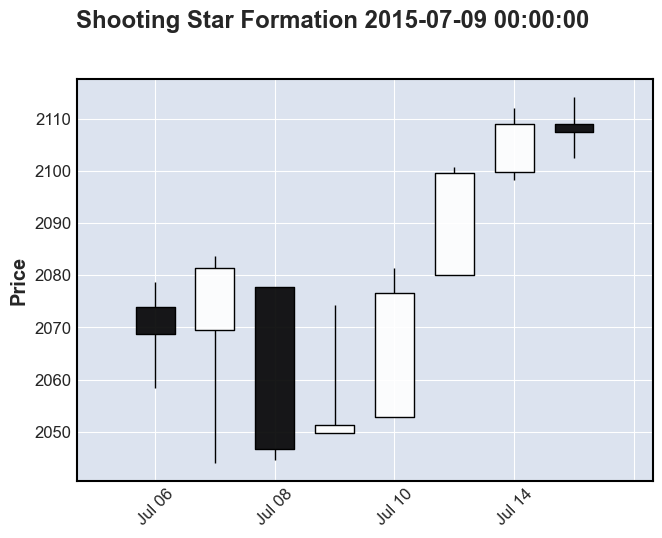

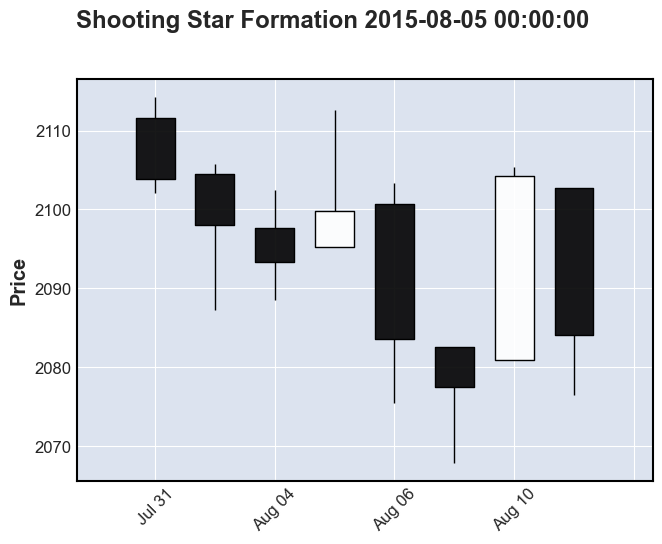

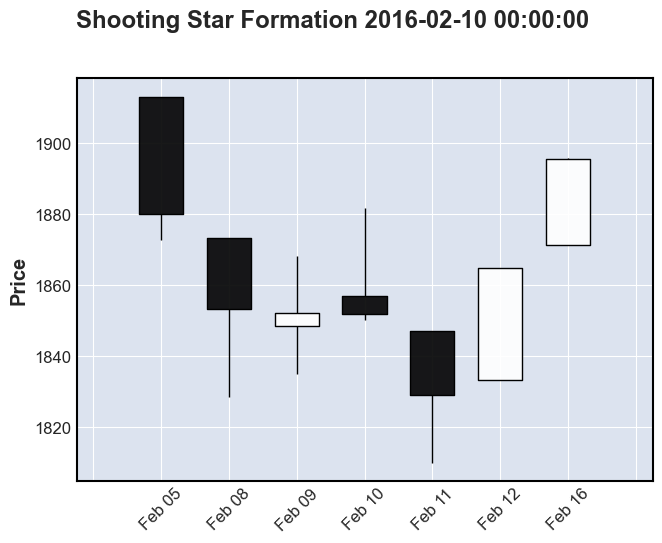

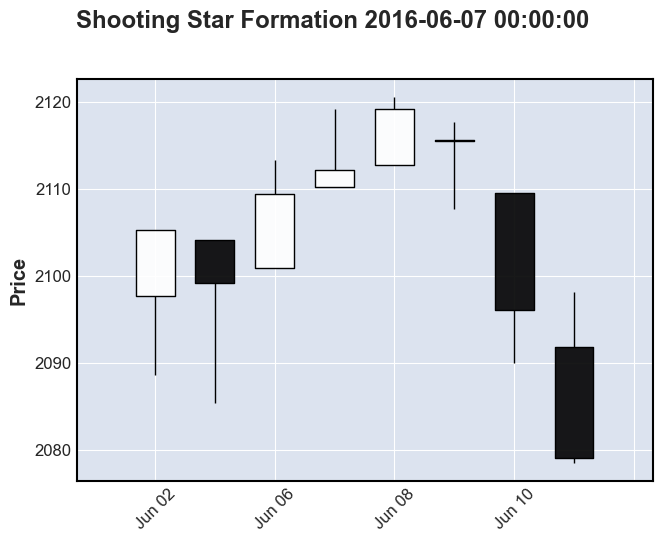

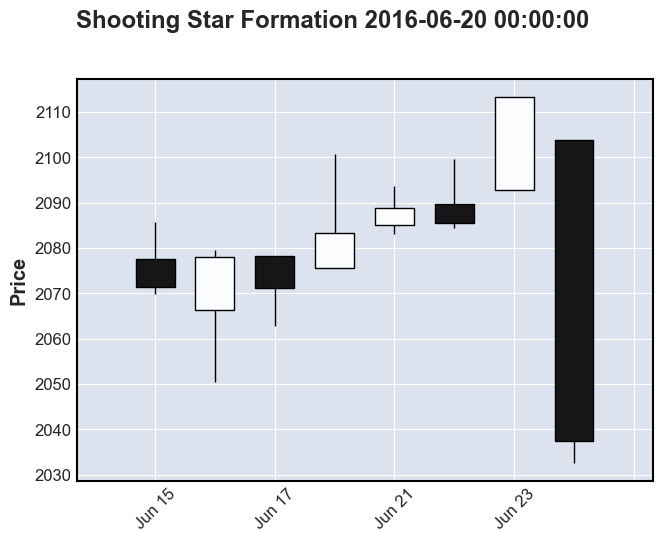

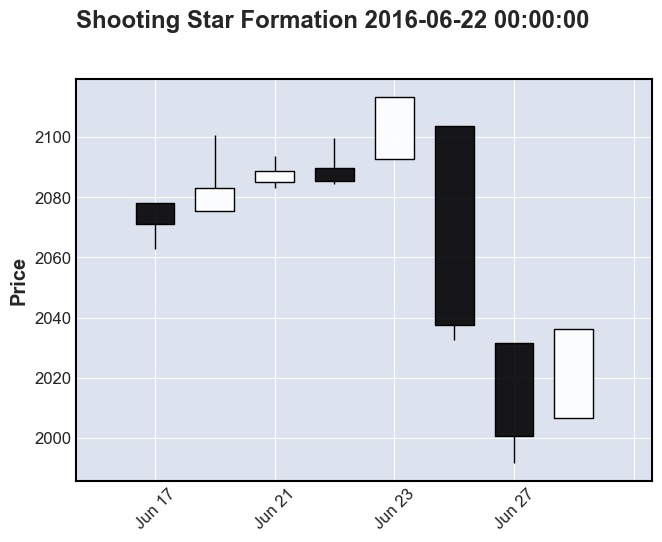

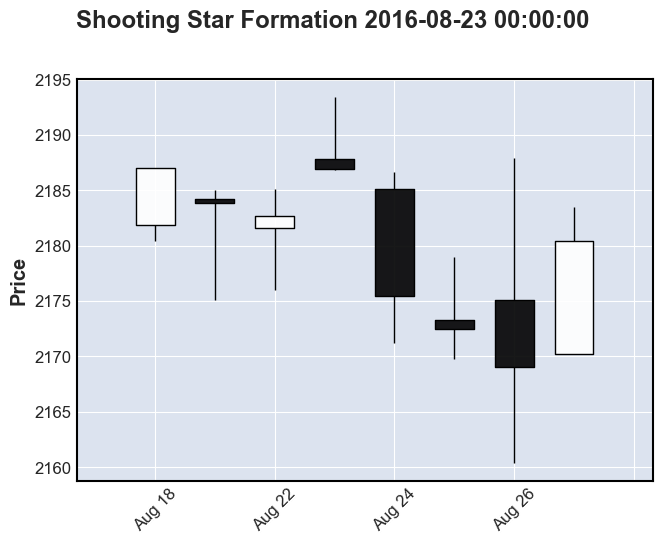

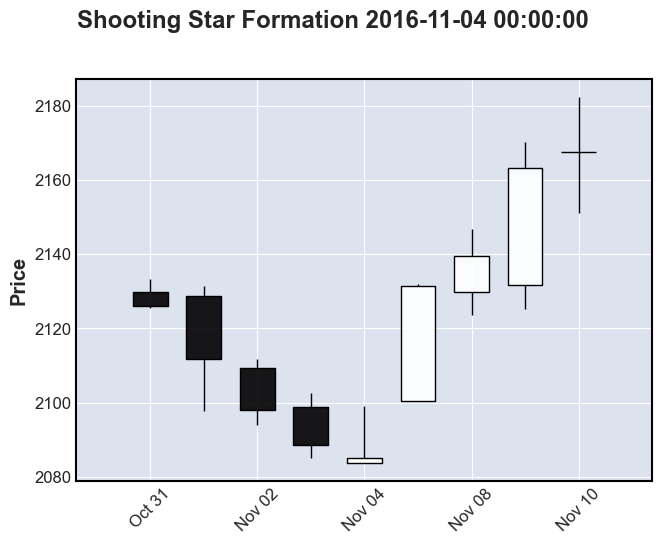

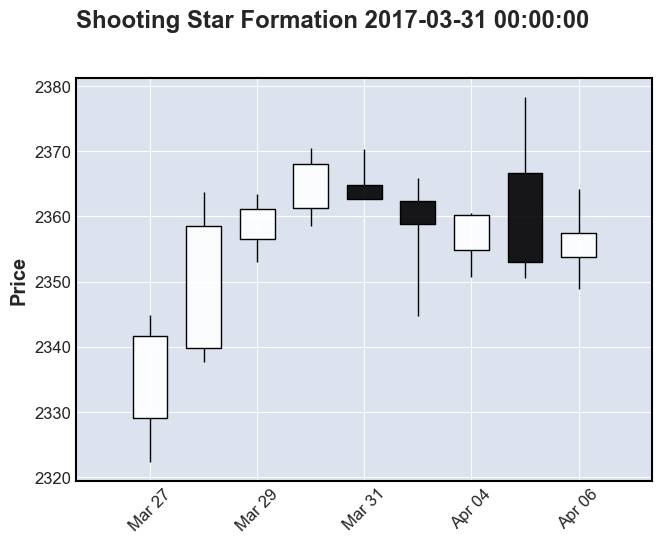

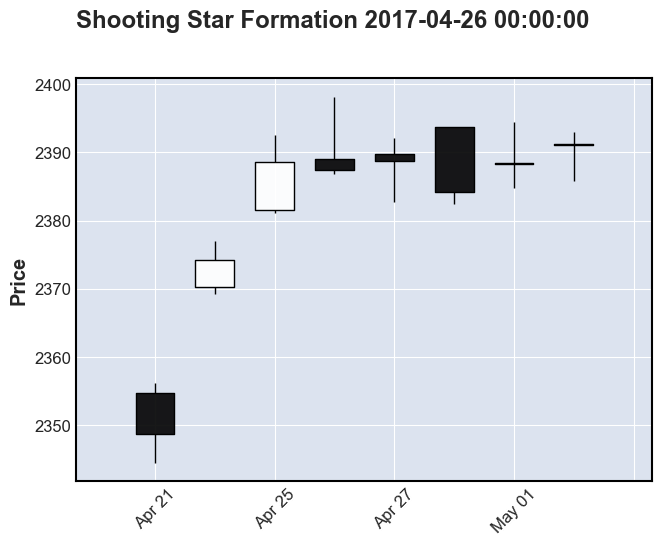

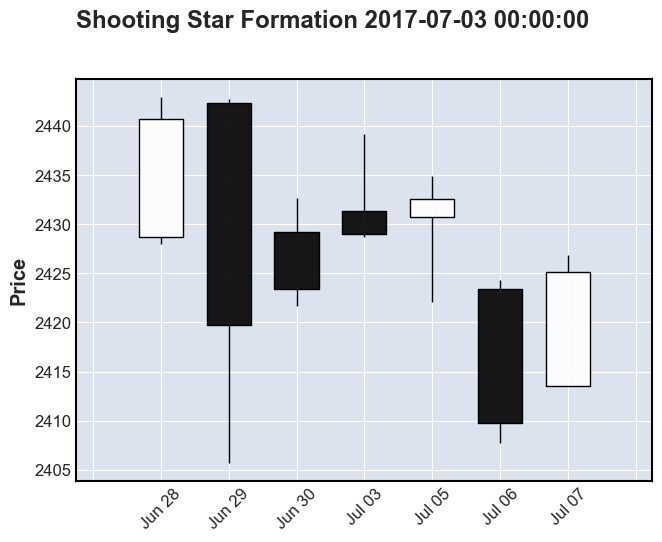

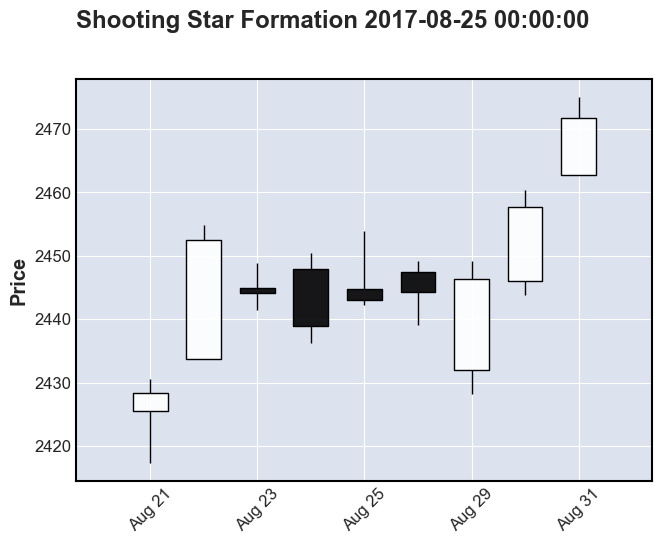

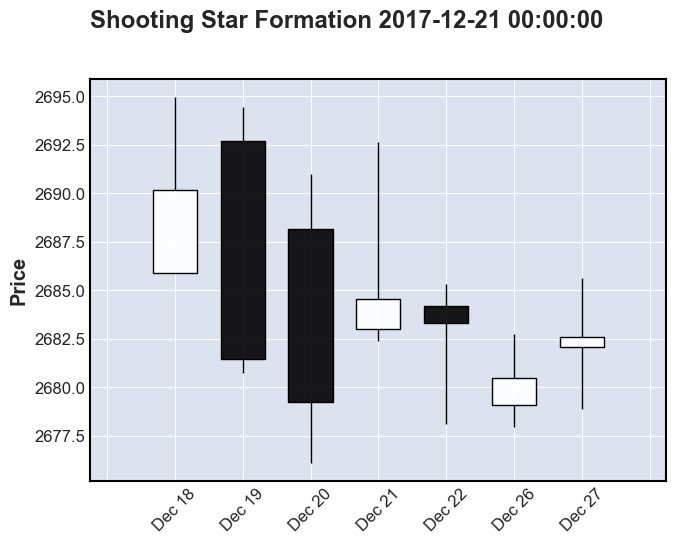

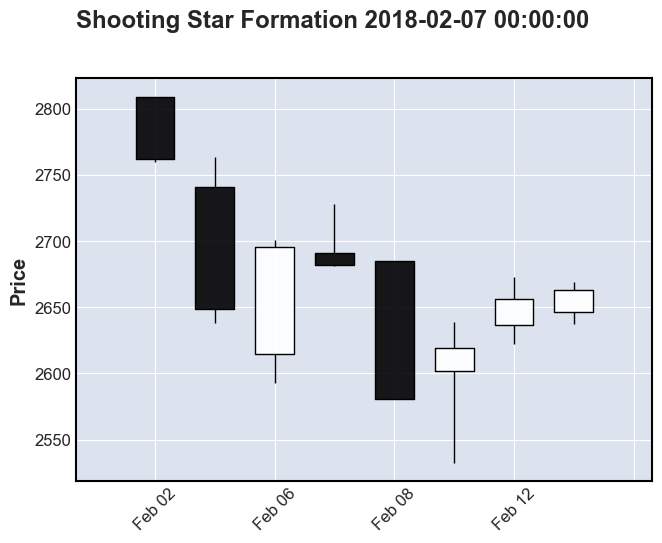

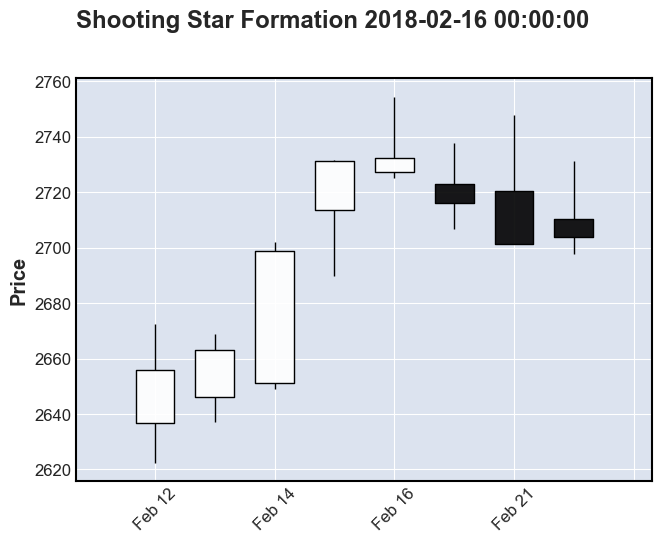

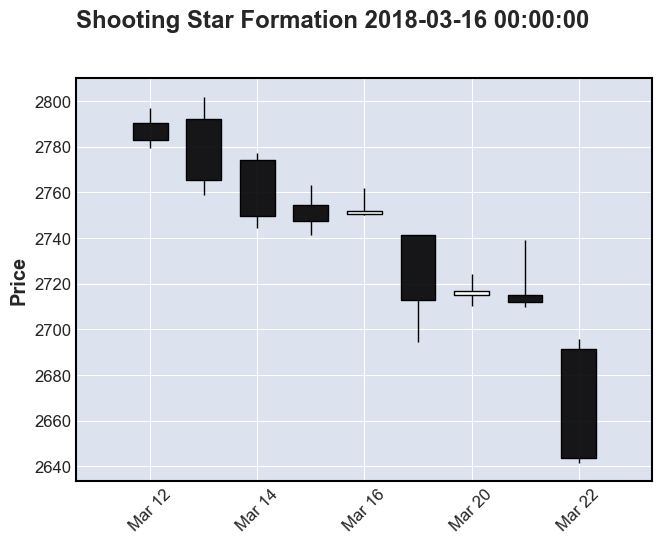

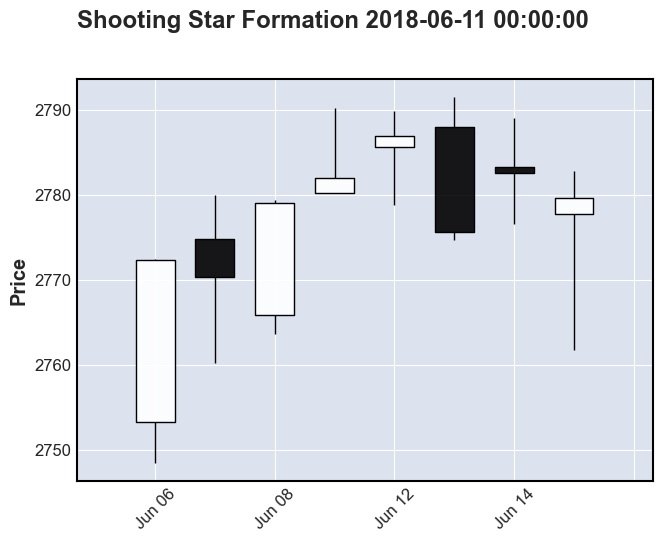

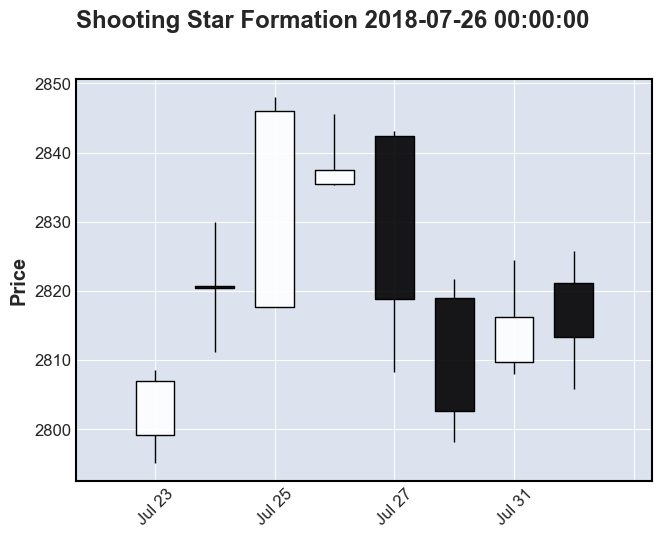

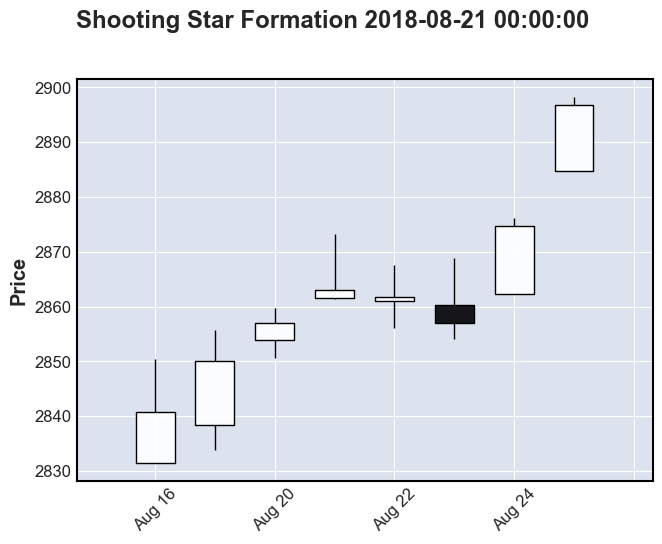

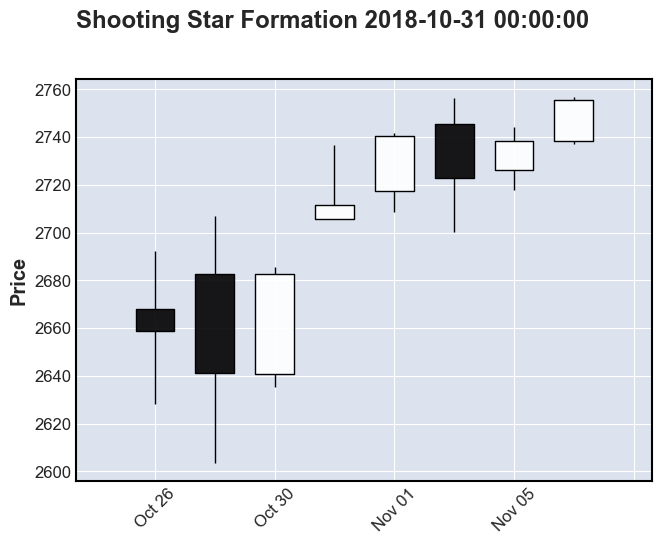

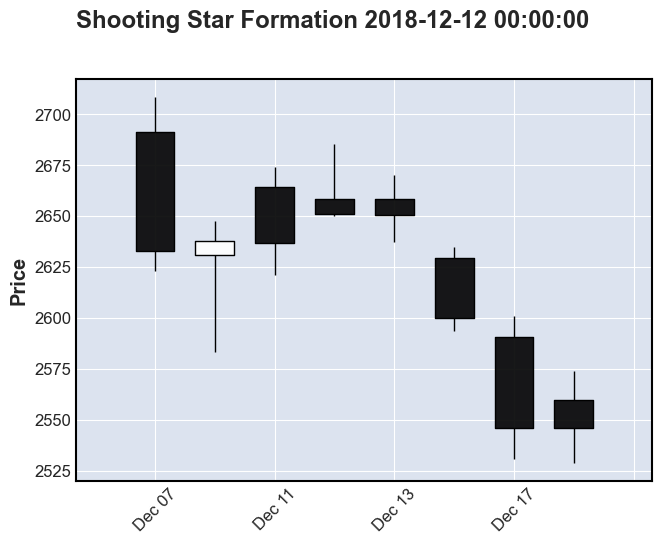

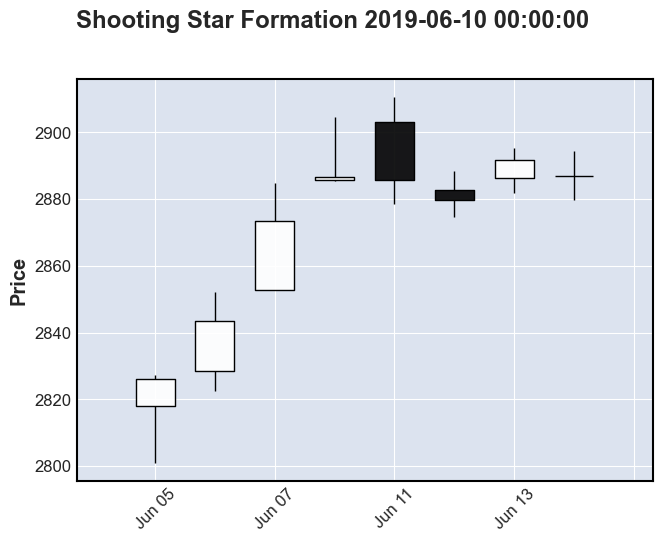

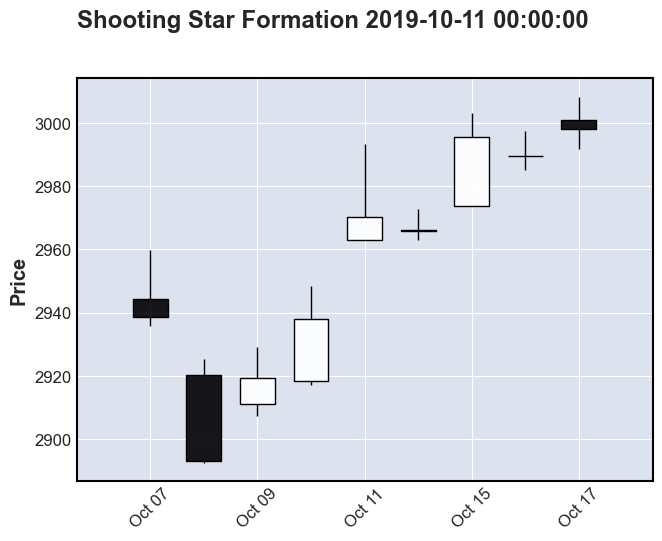

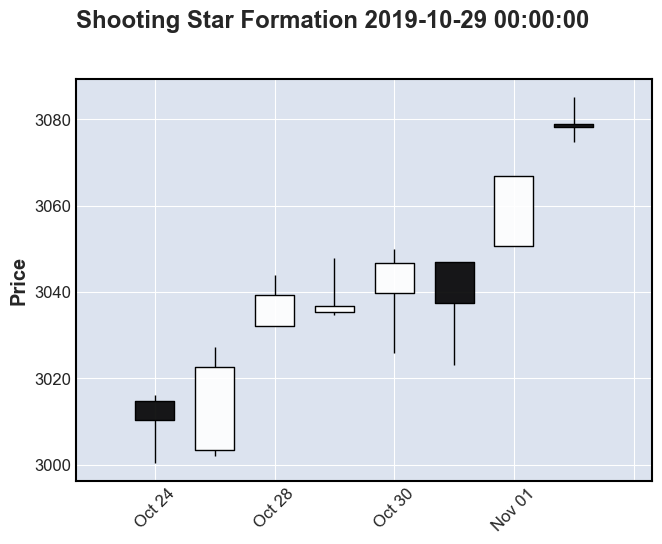

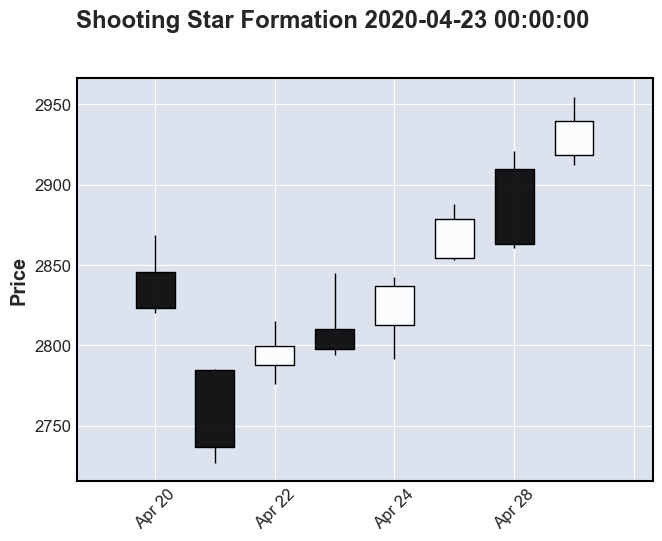

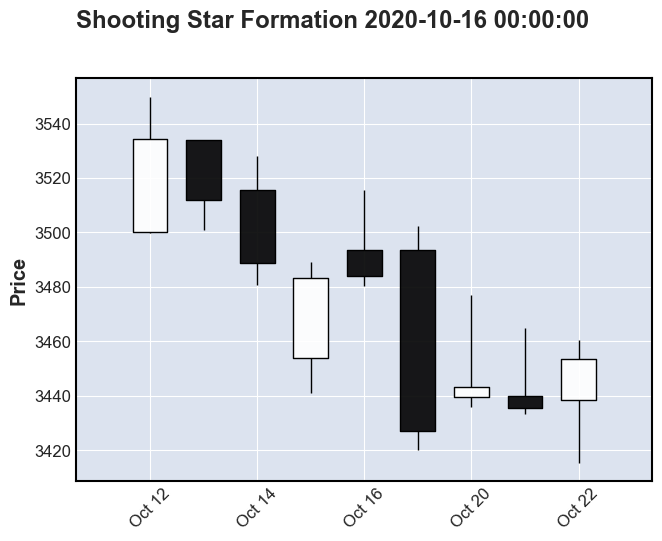

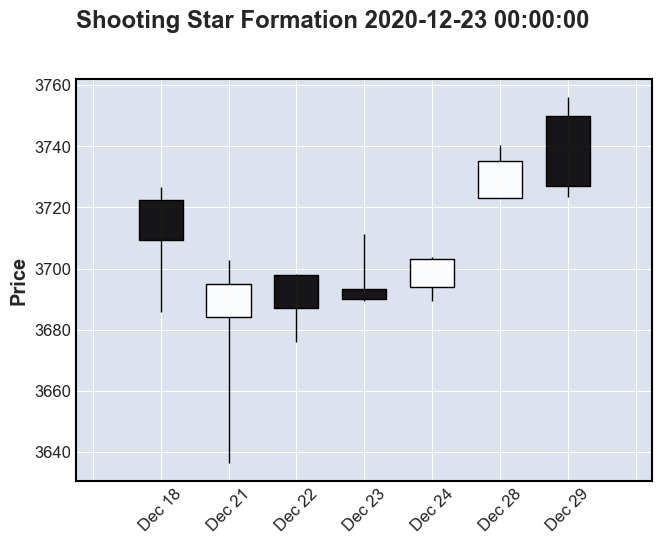

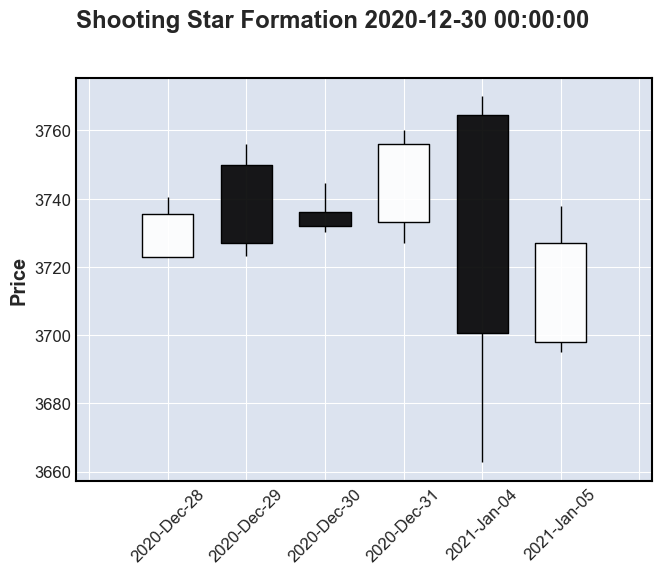

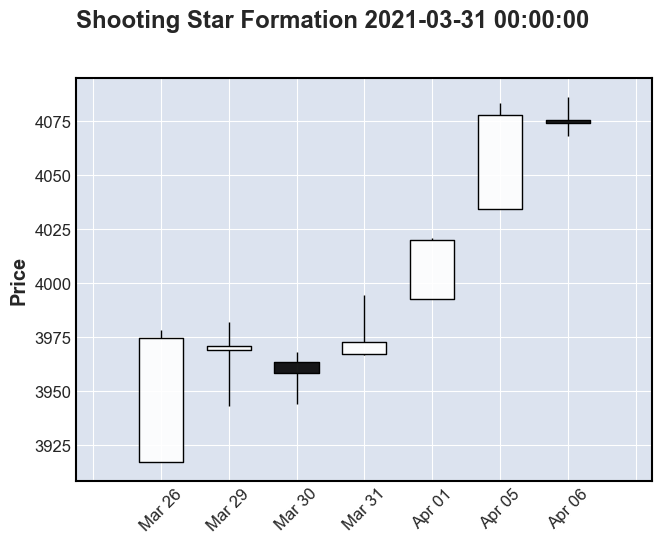

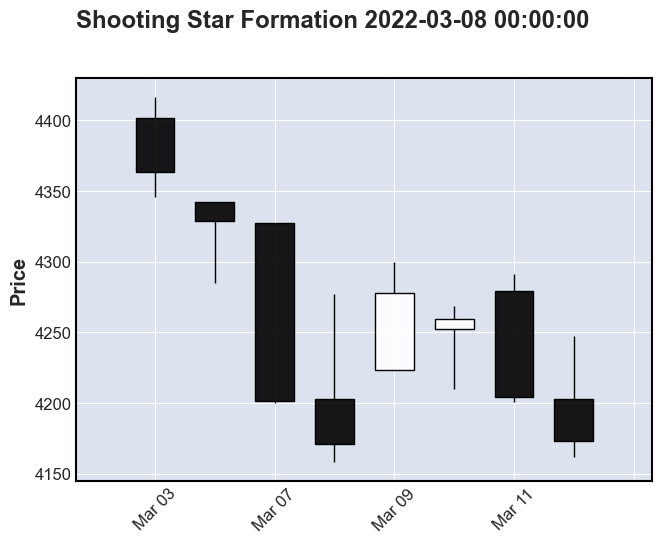

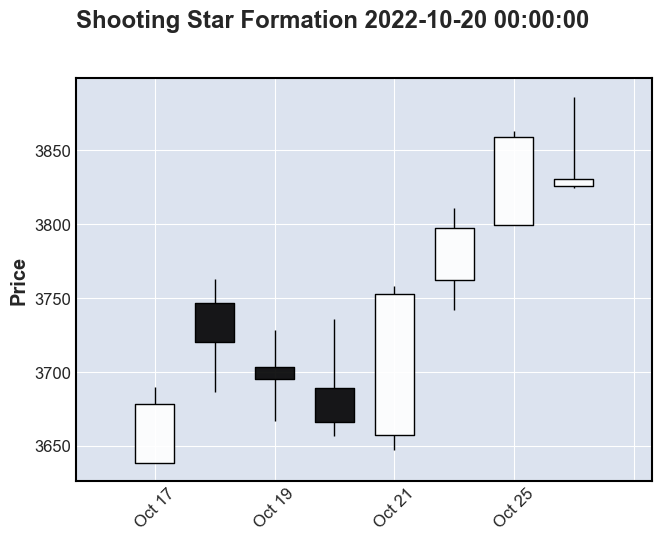

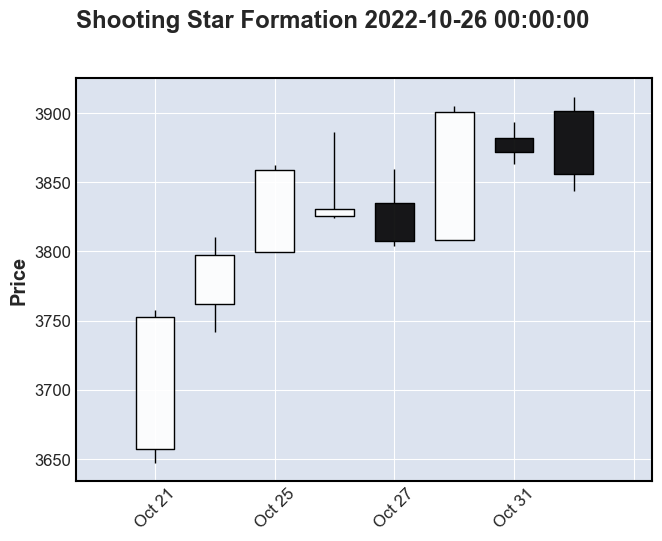

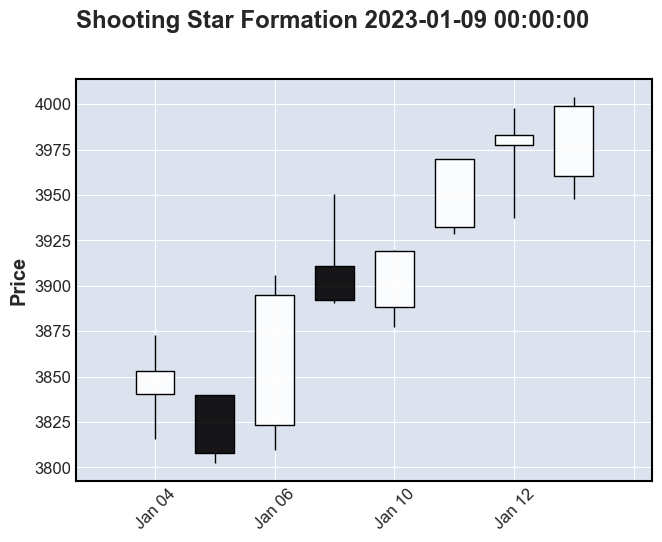

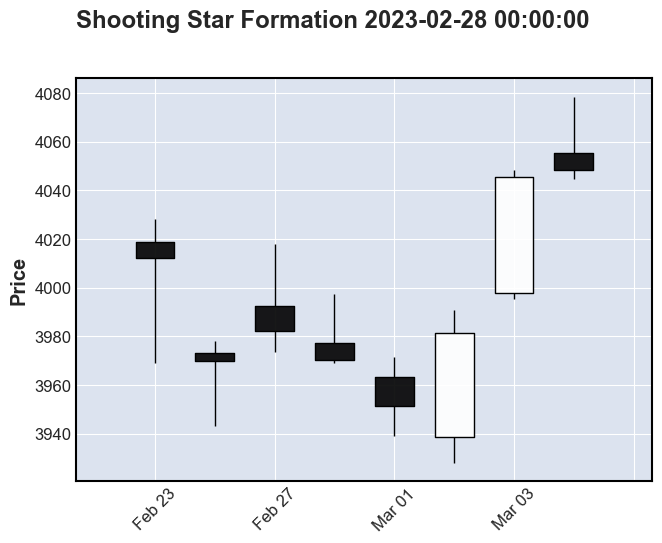

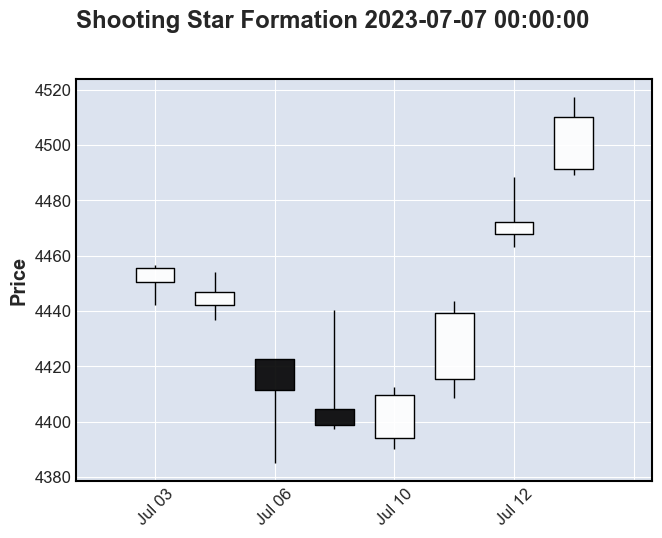

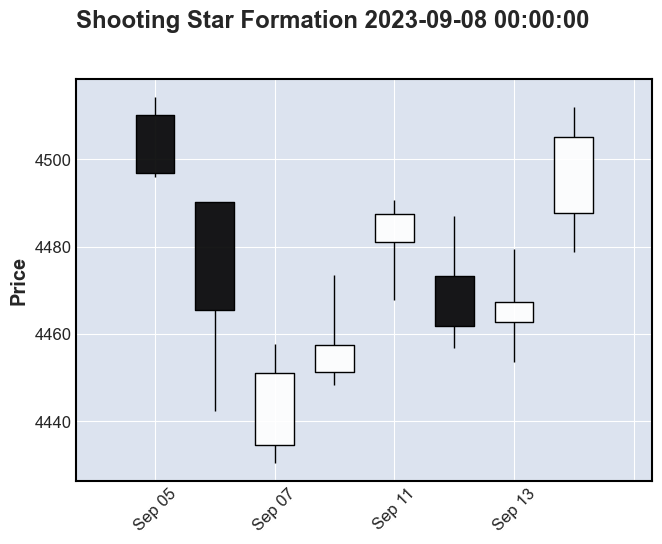

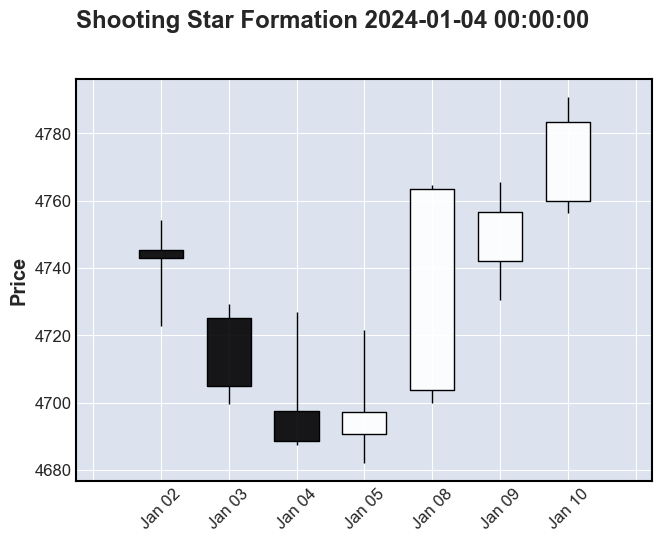

<Figure size 640x480 with 0 Axes>

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-05-24  1373.859985  1401.750000  1361.089966  1399.050049  1399.050049   
2000-05-25  1399.050049  1411.650024  1373.930054  1381.520020  1381.520020   
2000-05-26  1381.520020  1391.420044  1369.750000  1378.020020  1378.020020   
2000-05-30  1378.020020  1422.449951  1378.020020  1422.449951  1422.449951   
2000-05-31  1422.439941  1434.489990  1415.500000  1420.599976  1420.599976   
...                 ...          ...          ...          ...          ...   
2024-01-25  4886.660156  4898.149902  4869.339844  4894.160156  4894.160156   
2024-01-26  4888.910156  4906.689941  4881.470215  4890.970215  4890.970215   
2024-01-29  4892.950195  4929.310059  4887.399902  4927.930176  4927.930176   
2024-01-30  4925.890137  4931.089844  4916.270020  4924.970215  4924.970215   
2024-01-31  4899.189941  4906.750000  4845.149902  4845.649902  4845.649902   

                Volume     Change  Direction         MA10         MA20  \
Date                                                                     
2000-05-24  1152300000  25.190063          1  1421.276001  1426.065509   
2000-05-25   984500000 -17.530029          0  1418.646997  1421.895508   
2000-05-26   722600000  -3.500000          0  1414.353003  1418.175006   
2000-05-30   844200000  44.429932          1  1411.362000  1415.885004   
2000-05-31   960500000  -1.839966          0  1406.817993  1414.600500   
...                ...        ...        ...          ...          ...   
2024-01-25  4020430000   7.500000          1  4816.775049  4781.978076   
2024-01-26  3353400000   2.060059          1  4827.848047  4787.447583   
2024-01-29  3525160000  34.979980          1  4842.258057  4794.676587   
2024-01-30  3836130000  -0.919922          0  4858.157080  4802.433594   
2024-01-31  4696120000 -53.540039          0  4868.801074  4807.574585   

                   MA50        MA100        RSI  Stochastic_K  Stochastic_D  \
Date                                                                          
2000-05-24  1454.346997  1428.297998  44.368469     23.745746     29.372265   
2000-05-25  1454.134597  1427.560999  41.539809     19.487574     22.178108   
2000-05-26  1452.525598  1427.346998  40.978078     22.968362     22.067228   
2000-05-30  1451.685198  1427.550398  50.186817     30.103998     24.186645   
2000-05-31  1450.964597  1427.721898  49.838139     42.021155     31.697838   
...                 ...          ...        ...           ...           ...   
2024-01-25  4677.269023  4507.758813  72.932465     92.601030     93.015869   
2024-01-26  4686.857432  4511.510815  72.142640     90.749789     91.389010   
2024-01-29  4695.502031  4515.821816  75.458828     95.820406     93.057075   
2024-01-30  4703.943838  4520.416719  74.691975     96.309402     94.293199   
2024-01-31  4710.692031  4524.361816  57.753821     85.673634     92.601147   

            Is_Shooting_Star  
Date                          
2000-05-24             False  
2000-05-25             False  
2000-05-26             False  
2000-05-30             False  
2000-05-31             False  
...                      ...  
2024-01-25             False  
2024-01-26             False  
2024-01-29             False  
2024-01-30             False  
2024-01-31             False  

[5959 rows x 16 columns]

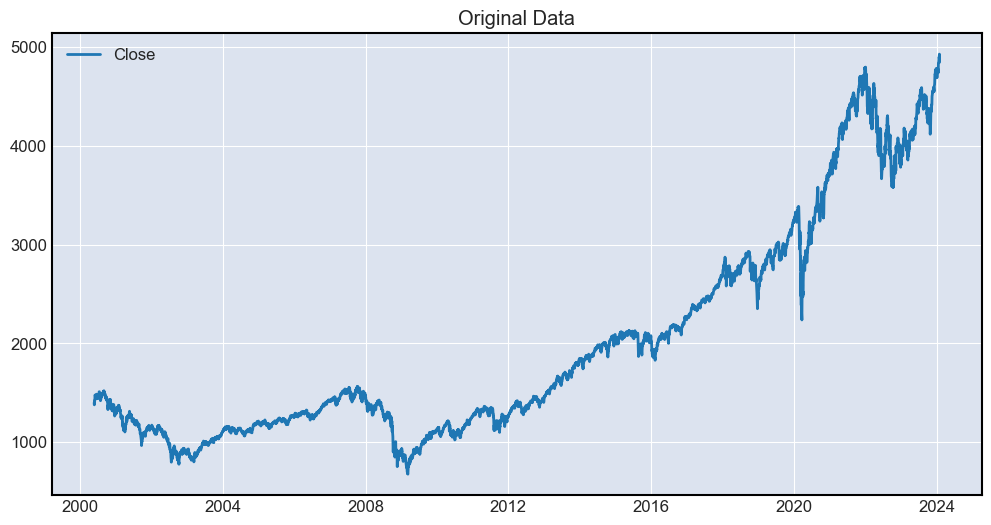

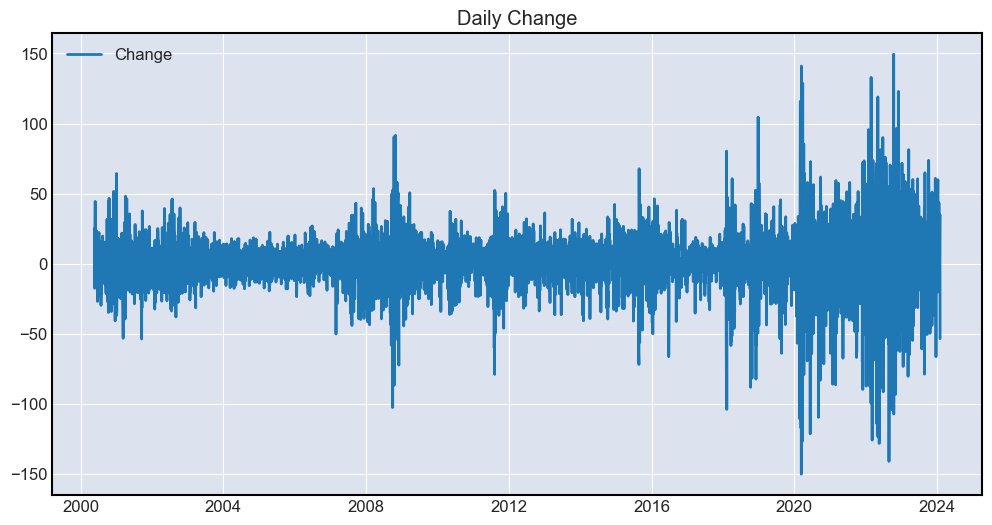

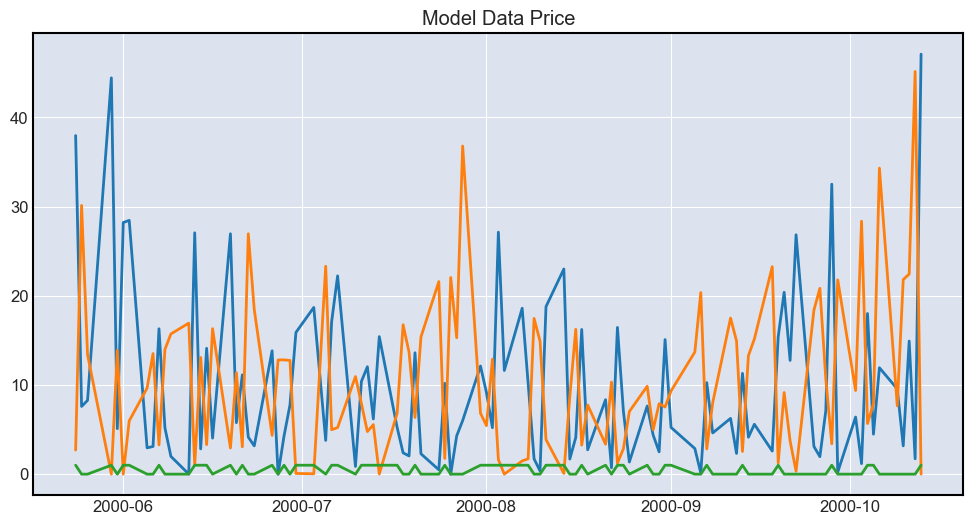

In [10]:
data = prepare_data(SP500_TICKER)


# Show data
print(data.shape)
print(data.dtypes)

# predict_dataframe = pd.to_datetime(predict["x"])
# Plot candlestick chart
fig, ax = plt.subplots(figsize=(2, 2))
# mpf.plot(data[0:10], type='candle', volume=False, ax=ax)
# Filter the DataFrame to include only the rows corresponding to shooting star formations
shooting_star_formations = data[data['Is_Shooting_Star']]
# Plot the candlestick chart with annotations for the first 10 shooting star formations
print(shooting_star_formations.shape)
num_candles = 5

# Iterate over the shooting star formations and plot each formation in a separate chart
for index, row in shooting_star_formations.iterrows():
    # Extract the rows corresponding to the current shooting star formation
    index_pos = data.index.get_loc(index)
    
    start_date = index - DateOffset(days=num_candles)
    end_date = index + DateOffset(days=num_candles + 1)
    formation_data = data.loc[start_date:end_date]

    # Plot the candlestick chart for the current shooting star formation
    mpf.plot(formation_data, type='candle', volume=False, title='Shooting Star Formation {}'.format(index))

    # Show the plot
    mpf.show()


# Save the plot as an image with 50x50 pixels
plt.savefig('candlestick_chart.png', dpi=100)  # Adjust dpi for desired resolution

# Show the plot
# plt.show()
plt.show()

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Change)
plt.legend(['Change'])


test = data['Close'] - data['Low']
tets2 = data['High'] - data['Close']

plt = config_chart('Model Data Price')
plt.plot(test [0:100])
plt.plot(tets2[0:100])
plt.plot(data.Direction[0:100])

data

---

## For **normalize_data** function

In [ ]:
data = normalize_data(data)


# Show data
# plt = config_chart('Normalized Data')
# plt.plot(data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

data

Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-05-24  1373.859985  1401.750000  1361.089966  1399.050049  1399.050049   
2000-05-25  1399.050049  1411.650024  1373.930054  1381.520020  1381.520020   
2000-05-26  1381.520020  1391.420044  1369.750000  1378.020020  1378.020020   
2000-05-30  1378.020020  1422.449951  1378.020020  1422.449951  1422.449951   
2000-05-31  1422.439941  1434.489990  1415.500000  1420.599976  1420.599976   
...                 ...          ...          ...          ...          ...   
2024-01-25  4886.660156  4898.149902  4869.339844  4894.160156  4894.160156   
2024-01-26  4888.910156  4906.689941  4881.470215  4890.970215  4890.970215   
2024-01-29  4892.950195  4929.310059  4887.399902  4927.930176  4927.930176   
2024-01-30  4925.890137  4931.089844  4916.270020  4924.970215  4924.970215   
2024-01-31  4899.189941  4906.750000  4845.149902  4845.649902  4845.649902   

                Volume     Change  Direction         MA10         MA20  \
Date                                                                     
2000-05-24  1152300000  25.190063          1  1421.276001  1426.065509   
2000-05-25   984500000 -17.530029          0  1418.646997  1421.895508   
2000-05-26   722600000  -3.500000          0  1414.353003  1418.175006   
2000-05-30   844200000  44.429932          1  1411.362000  1415.885004   
2000-05-31   960500000  -1.839966          0  1406.817993  1414.600500   
...                ...        ...        ...          ...          ...   
2024-01-25  4020430000   7.500000          1  4816.775049  4781.978076   
2024-01-26  3353400000   2.060059          1  4827.848047  4787.447583   
2024-01-29  3525160000  34.979980          1  4842.258057  4794.676587   
2024-01-30  3836130000  -0.919922          0  4858.157080  4802.433594   
2024-01-31  4696120000 -53.540039          0  4868.801074  4807.574585   

                   MA50        MA100        RSI  Stochastic_K  Stochastic_D  \
Date                                                                          
2000-05-24  1454.346997  1428.297998  44.368469     23.745746     29.372265   
2000-05-25  1454.134597  1427.560999  41.539809     19.487574     22.178108   
2000-05-26  1452.525598  1427.346998  40.978078     22.968362     22.067228   
2000-05-30  1451.685198  1427.550398  50.186817     30.103998     24.186645   
2000-05-31  1450.964597  1427.721898  49.838139     42.021155     31.697838   
...                 ...          ...        ...           ...           ...   
2024-01-25  4677.269023  4507.758813  72.932465     92.601030     93.015869   
2024-01-26  4686.857432  4511.510815  72.142640     90.749789     91.389010   
2024-01-29  4695.502031  4515.821816  75.458828     95.820406     93.057075   
2024-01-30  4703.943838  4520.416719  74.691975     96.309402     94.293199   
2024-01-31  4710.692031  4524.361816  57.753821     85.673634     92.601147   

            Is_Shooting_Star  
Date                          
2000-05-24             False  
2000-05-25             False  
2000-05-26             False  
2000-05-30             False  
2000-05-31             False  
...                      ...  
2024-01-25             False  
2024-01-26             False  
2024-01-29             False  
2024-01-30             False  
2024-01-31             False  

[5959 rows x 16 columns]

----

## For **prepare_sequences** function

(5958, 5)
(5958,)
[1.37385999e+03 1.40175000e+03 1.36108997e+03 1.39905005e+03
 1.00000000e+00]
2000-05-24T00:00:00.000000000
(5958,)
(5958,)
[0 0 1 ... 1 0 0]
2000-05-25T00:00:00.000000000


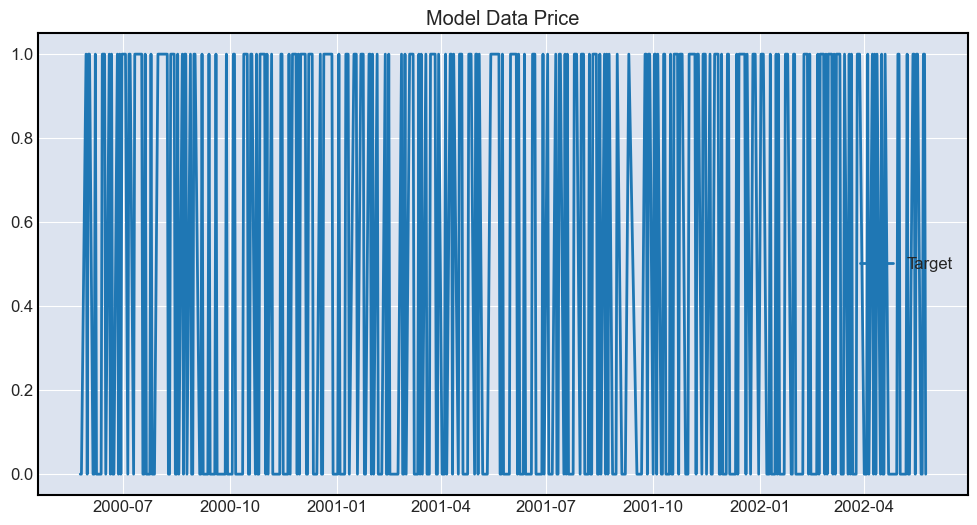

In [ ]:
indicators, indicators_dates, target, target_dates = prepare_sequences(data)

# # Show data
print(indicators.shape)
print(indicators_dates.shape)
print(indicators[0])
print(indicators_dates[0])

print(target.shape)
print(target_dates.shape)
print(target)
print(target_dates[0])

plt = config_chart('Model Data Price')
plt.plot(target_dates[0:500], target[0:500])
plt.legend(['Target'])


---

## For **split_train_and_test_data** function

(4766, 5)
(4766,)
(596, 5)
(596,)
(596, 5)
(596,)


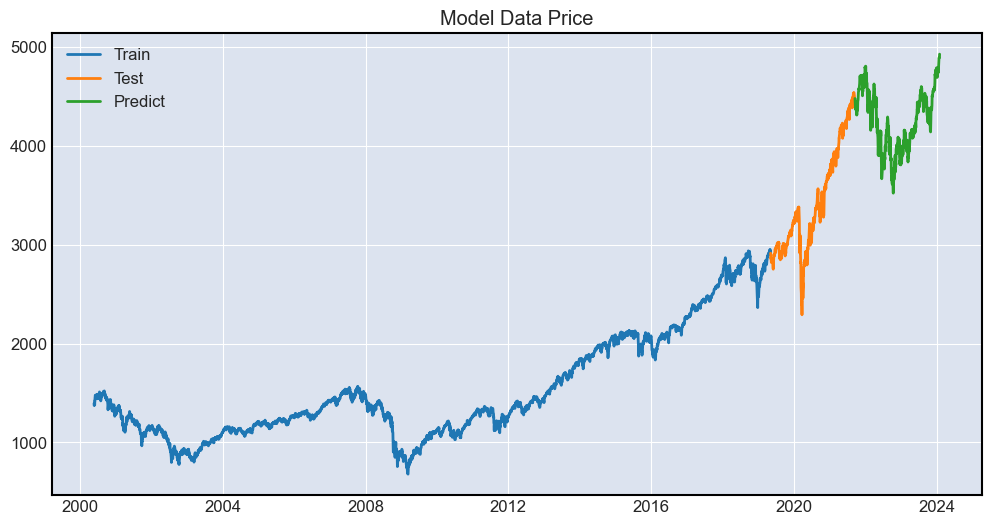

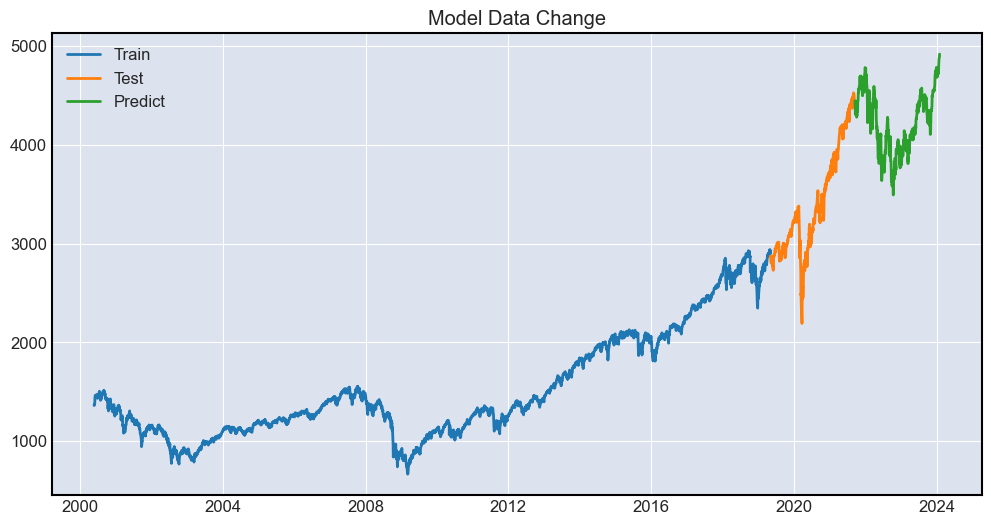

In [ ]:
train, test, predict = split_train_and_test_data(indicators, target, indicators_dates, target_dates)


# Show data:
print(train["x"].shape)
print(train["y"].shape)

print(test["x"].shape)
print(test["y"].shape)

print(predict["x"].shape)
print(predict["y"].shape)

plt = config_chart('Model Data Price')
plt.plot(train['x_dates'], train['x'][:, 0])
plt.plot(test['x_dates'], test['x'][:, 0])
plt.plot(predict['x_dates'], predict['x'][:, 0])
plt.legend(['Train', 'Test', 'Predict'])

plt = config_chart('Model Data Change')
plt.plot(train['x_dates'], train['x'][:, 2])
plt.plot(test['x_dates'], test['x'][:, 2])
plt.plot(predict['x_dates'], predict['x'][:, 2])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **get_lstm_data** function

In [ ]:
train, test, predict = get_cnn_data(SP500_TICKER)

In [ ]:
print(train["x"].shape) 
print(train["x"])

print(train["y"].shape)
print(train["y"])


(4766, 5)
[[1.37385999e+03 1.40175000e+03 1.36108997e+03 1.39905005e+03
  1.00000000e+00]
 [1.39905005e+03 1.41165002e+03 1.37393005e+03 1.38152002e+03
  0.00000000e+00]
 [1.38152002e+03 1.39142004e+03 1.36975000e+03 1.37802002e+03
  0.00000000e+00]
 ...
 [2.92215991e+03 2.93167993e+03 2.90050000e+03 2.91752002e+03
  0.00000000e+00]
 [2.92920996e+03 2.94785010e+03 2.92920996e+03 2.94563989e+03
  1.00000000e+00]
 [2.90888989e+03 2.93732007e+03 2.89820996e+03 2.93246997e+03
  1.00000000e+00]]
(4766,)
[0 0 1 ... 1 1 0]


In [ ]:
print(test["x"].shape) 
print(test["x"])

print(test["y"].shape)
print(test["y"])

(596, 5)
[[2.91303003e+03 2.91303003e+03 2.86260010e+03 2.88405005e+03
  0.00000000e+00]
 [2.87961011e+03 2.89795996e+03 2.87328003e+03 2.87941992e+03
  0.00000000e+00]
 [2.85984009e+03 2.87596997e+03 2.83639990e+03 2.87071997e+03
  1.00000000e+00]
 ...
 [4.47481006e+03 4.49299023e+03 4.44570020e+03 4.46872998e+03
  0.00000000e+00]
 [4.47933008e+03 4.48568018e+03 4.43545996e+03 4.44304980e+03
  0.00000000e+00]
 [4.44749023e+03 4.48687012e+03 4.43837012e+03 4.48070020e+03
  1.00000000e+00]]
(596,)
[0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0

In [ ]:
print(predict["x"].shape) 
print(predict["x"])

print(predict["y"].shape)
print(predict["y"])

(596, 5)
[[4.47708984e+03 4.48587012e+03 4.44379980e+03 4.47375000e+03
  0.00000000e+00]
 [4.46974023e+03 4.47152002e+03 4.42775977e+03 4.43299023e+03
  0.00000000e+00]
 [4.40295020e+03 4.40295020e+03 4.30591016e+03 4.35772998e+03
  0.00000000e+00]
 ...
 [4.88891016e+03 4.90668994e+03 4.88147021e+03 4.89097021e+03
  1.00000000e+00]
 [4.89295020e+03 4.92931006e+03 4.88739990e+03 4.92793018e+03
  1.00000000e+00]
 [4.92589014e+03 4.93108984e+03 4.91627002e+03 4.92497021e+03
  0.00000000e+00]]
(596,)
[0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1

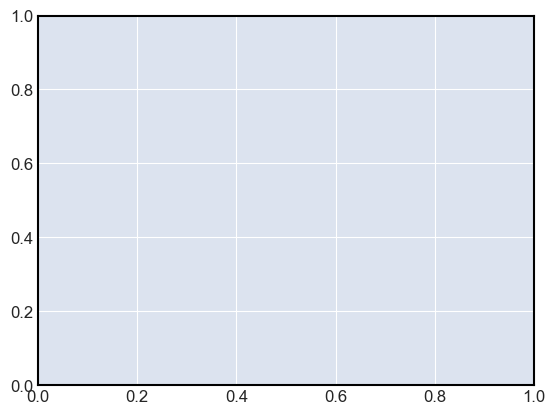

In [ ]:
num_columns = predict["x"].shape[1]  # Get the number of columns

index = 20

plt = config_chart('Model Data')
plt.plot(predict['x_dates'][0:index], predict["x"][:, 0][0:index])
plt.plot(predict['x_dates'][0:index], predict["x"][:, 1][0:index])
plt.plot(predict['x_dates'][0:index], predict["x"][:, 2][0:index])
plt.plot(predict['x_dates'][0:index], predict["x"][:, 3][0:index])
# plt.title(f'Column {i+1}')
plt.xlabel('Index')
plt.ylabel('Value')

plt.grid(True)  # Add grid
plt.tight_layout()
plt.savefig('stock_price_50x50.png', dpi=100)  # Save as PNG image with 100 DPI
plt.close()

plt.grid(True)
plt.show()


In [ ]:

# Create subplots
# fig, ax = plt.subplots()

predict_dataframe = pd.to_datetime(predict["x"])
# Plot candlestick chart
mpf.plot(predict_dataframe, type='candle', style='charles', volume=True)

# Show the plot
plt.show()

TypeError: arg must be a string, datetime, list, tuple, 1-d array, or Series